In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Define the path to the cleaned data
data_path = "/home/moraa-ontita/Documents/Machine-learning/Stock_Price_Prediction/artifacts/notebooks/eda.csv"

# Load the data
df = pd.read_csv(data_path)

# Display the first few rows to verify
print(df.head())

         Date    Adj Close        Close         High          Low  \
0  2000-01-03  1455.219971  1455.219971  1478.000000  1438.359985   
1  2000-01-04  1399.420044  1399.420044  1455.219971  1397.430054   
2  2000-01-05  1402.109985  1402.109985  1413.270020  1377.680054   
3  2000-01-06  1403.449951  1403.449951  1411.900024  1392.099976   
4  2000-01-07  1441.469971  1441.469971  1441.469971  1400.729980   

          Open      Volume  
0  1469.250000   931800000  
1  1455.219971  1009000000  
2  1399.420044  1085500000  
3  1402.109985  1092300000  
4  1403.449951  1225200000  


# Plots

## Time Series Plot

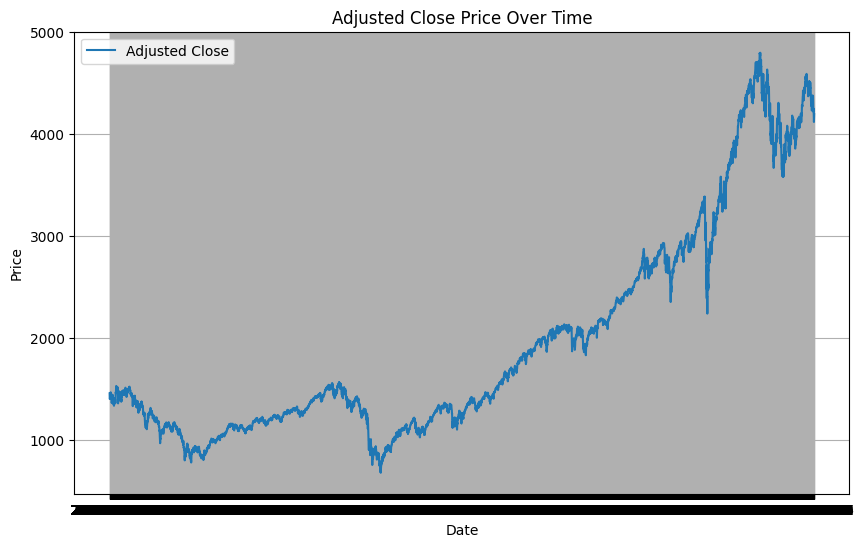

In [3]:
# Plot Adjusted Close Price over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj Close'], label='Adjusted Close')
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


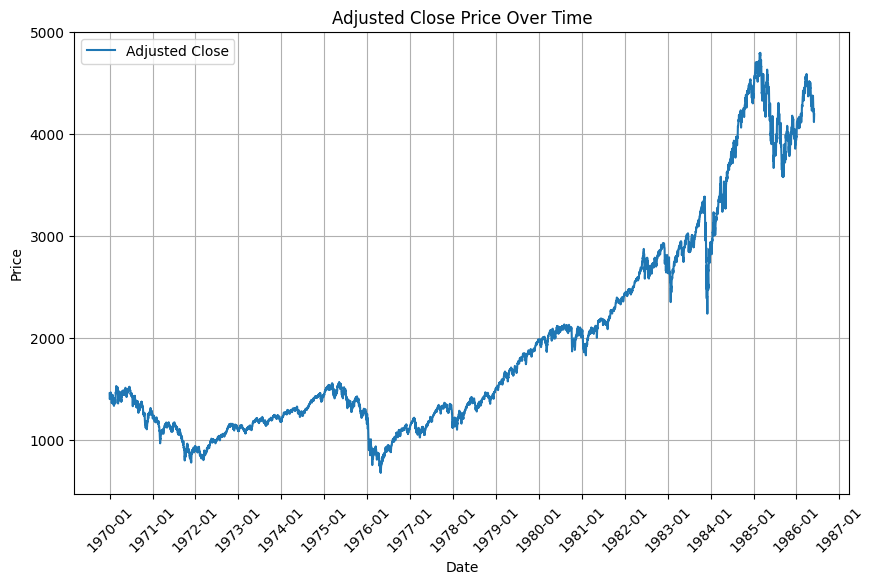

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot Adjusted Close Price over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj Close'], label='Adjusted Close')

# Formatting the x-axis
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Use a DateFormatter to set the date format
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Show one tick per year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as "YYYY-MM"

# Rotate date labels
plt.xticks(rotation=45)

plt.show()


## Correlation Heatmap

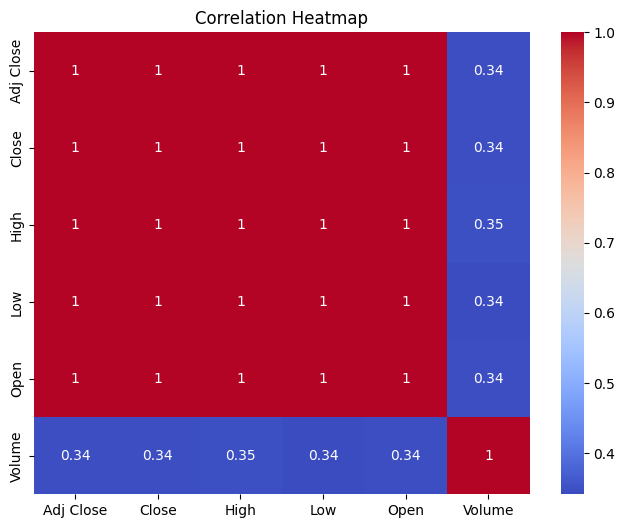

In [5]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlations for numeric columns
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [6]:
print(correlation_matrix)

           Adj Close     Close      High       Low      Open    Volume
Adj Close   1.000000  1.000000  0.999893  0.999904  0.999796  0.344008
Close       1.000000  1.000000  0.999893  0.999904  0.999796  0.344008
High        0.999893  0.999893  1.000000  0.999846  0.999921  0.346863
Low         0.999904  0.999904  0.999846  1.000000  0.999884  0.341266
Open        0.999796  0.999796  0.999921  0.999884  1.000000  0.344702
Volume      0.344008  0.344008  0.346863  0.341266  0.344702  1.000000


## Volume Distribution

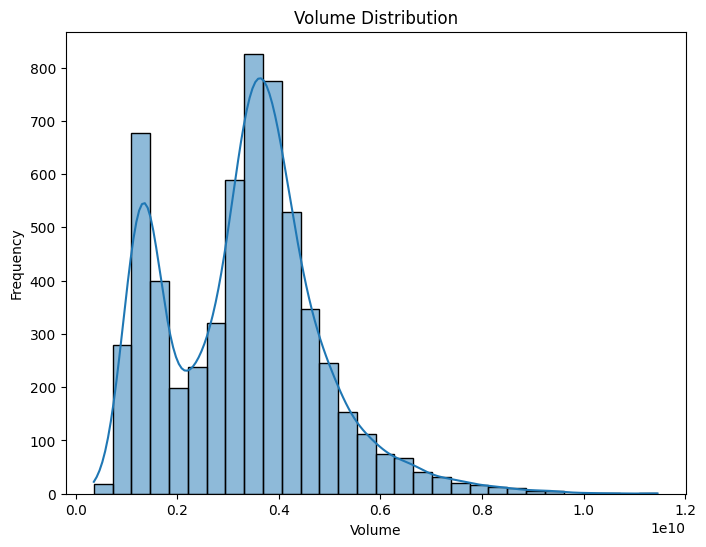

In [7]:
# Plot Volume Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Volume'], kde=True, bins=30)
plt.title('Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()


In [8]:
# Summary statistics for the Volume column
volume_stats = df['Volume'].describe()
print(volume_stats)


count    5.996000e+03
mean     3.322962e+09
std      1.511115e+09
min      3.560700e+08
25%      2.074988e+09
50%      3.438740e+09
75%      4.157938e+09
max      1.145623e+10
Name: Volume, dtype: float64


In [9]:
# Bin the volume data
bins = pd.cut(df['Volume'], bins=10)  # Adjust 'bins' to control the number of intervals
frequency_table = bins.value_counts().sort_index()

# Display as a table
frequency_df = pd.DataFrame({
    'Range': frequency_table.index.astype(str),
    'Frequency': frequency_table.values
})
print(frequency_df)


                            Range  Frequency
0     (344969840.0, 1466086000.0]        975
1    (1466086000.0, 2576102000.0]        836
2    (2576102000.0, 3686118000.0]       1736
3    (3686118000.0, 4796134000.0]       1649
4    (4796134000.0, 5906150000.0]        510
5    (5906150000.0, 7016166000.0]        182
6    (7016166000.0, 8126182000.0]         70
7    (8126182000.0, 9236198000.0]         28
8   (9236198000.0, 10346214000.0]          8
9  (10346214000.0, 11456230000.0]          2


In [10]:
import numpy as np

# Calculate percentiles
percentiles = [0, 25, 50, 75, 100]
volume_percentiles = np.percentile(df['Volume'], percentiles)

# Create a table
percentile_table = pd.DataFrame({
    'Percentile': percentiles,
    'Volume': volume_percentiles
})
print(percentile_table)


   Percentile        Volume
0           0  3.560700e+08
1          25  2.074988e+09
2          50  3.438740e+09
3          75  4.157938e+09
4         100  1.145623e+10


In [11]:
# Calculate z-scores
df_Zscore = df
df_Zscore['Volume_Zscore'] = (df_Zscore['Volume'] - df_Zscore['Volume'].mean()) / df_Zscore['Volume'].std()

# Highlight potential outliers
outliers = df_Zscore[df_Zscore['Volume_Zscore'].abs() > 3]  # Adjust the threshold as needed
print(outliers[['Date', 'Volume', 'Volume_Zscore']])


            Date       Volume  Volume_Zscore
2187  2008-09-15   8279510000       3.280060
2188  2008-09-16   9459830000       4.061152
2189  2008-09-17   9431870000       4.042650
2190  2008-09-18  10082690000       4.473338
2191  2008-09-19   9387170000       4.013069
2202  2008-10-06   7956020000       3.065987
2204  2008-10-08   8716330000       3.569132
2206  2008-10-10  11456230000       5.382296
2208  2008-10-14   8161990000       3.202290
2210  2008-10-16   7984500000       3.084834
2235  2008-11-20   9093740000       3.818888
2236  2008-11-21   9495900000       4.085022
2237  2008-11-24   7879440000       3.015309
2296  2009-02-20   8210590000       3.234452
2301  2009-02-27   8926480000       3.708201
2302  2009-03-02   7868290000       3.007930
2308  2009-03-10   8618330000       3.504279
2312  2009-03-16   7883540000       3.018022
2314  2009-03-18   9098450000       3.822005
2315  2009-03-19   9033870000       3.779268
2348  2009-05-06   8555040000       3.462396
2349  2009

## High vs Low Prices

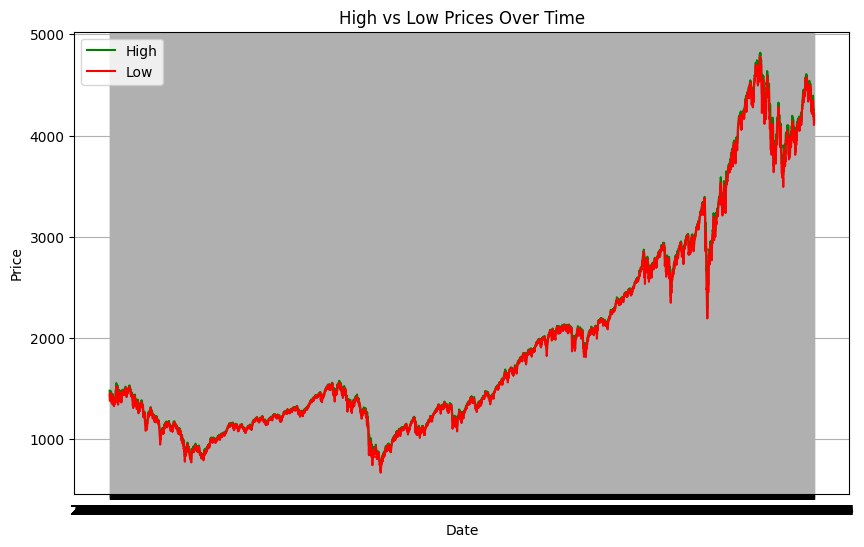

In [12]:
# Plot High vs Low Prices
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['High'], label='High', color='green')
plt.plot(df['Date'], df['Low'], label='Low', color='red')
plt.title('High vs Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Summary statistics for High and Low prices
high_low_stats = df[['High', 'Low']].describe()
print(high_low_stats)


              High          Low
count  5996.000000  5996.000000
mean   1967.198970  1943.105309
std    1048.053722  1037.081914
min     695.270020   666.789978
25%    1197.727509  1183.497528
50%    1462.340027  1443.609985
75%    2562.515076  2532.022522
max    4818.620117  4780.040039


In [14]:
# Calculate daily range
df_High_Low_Difference = df
df_High_Low_Difference['High_Low_Difference'] = df_High_Low_Difference['High'] - df_High_Low_Difference['Low']

# Summary statistics for the difference
difference_stats = df_High_Low_Difference['High_Low_Difference'].describe()
print(difference_stats)


count    5996.000000
mean       24.093661
std        21.308892
min         2.900024
25%        11.290039
50%        17.210022
75%        28.269989
max       218.959961
Name: High_Low_Difference, dtype: float64


In [15]:
# Display High, Low, and the difference in a table
high_low_diff_table = df_High_Low_Difference[['Date', 'High', 'Low', 'High_Low_Difference']]
print(high_low_diff_table.head())  # Show the first few rows


         Date         High          Low  High_Low_Difference
0  2000-01-03  1478.000000  1438.359985            39.640015
1  2000-01-04  1455.219971  1397.430054            57.789917
2  2000-01-05  1413.270020  1377.680054            35.589966
3  2000-01-06  1411.900024  1392.099976            19.800049
4  2000-01-07  1441.469971  1400.729980            40.739990


In [16]:
# Find days with the highest High and lowest Low
highest_high = df_High_Low_Difference.loc[df_High_Low_Difference['High'].idxmax()]
lowest_low = df_High_Low_Difference.loc[df_High_Low_Difference['Low'].idxmin()]

# Find the day with the largest range (High - Low)
largest_range = df_High_Low_Difference.loc[df_High_Low_Difference['High_Low_Difference'].idxmax()]

print("Highest High:")
print(highest_high[['Date', 'High']])

print("\nLowest Low:")
print(lowest_low[['Date', 'Low']])

print("\nLargest High-Low Range:")
print(largest_range[['Date', 'High', 'Low', 'High_Low_Difference']])


Highest High:
Date     2022-01-04
High    4818.620117
Name: 5537, dtype: object

Lowest Low:
Date    2009-03-06
Low     666.789978
Name: 2306, dtype: object

Largest High-Low Range:
Date                    2020-03-13
High                   2711.330078
Low                    2492.370117
High_Low_Difference     218.959961
Name: 5080, dtype: object


In [17]:
import numpy as np

# Percentile breakdown for High and Low prices
percentiles = [0, 25, 50, 75, 100]
high_percentiles = np.percentile(df['High'], percentiles)
low_percentiles = np.percentile(df['Low'], percentiles)

# Create a table
percentile_table = pd.DataFrame({
    'Percentile': percentiles,
    'High Price': high_percentiles,
    'Low Price': low_percentiles
})
print(percentile_table)


   Percentile   High Price    Low Price
0           0   695.270020   666.789978
1          25  1197.727509  1183.497528
2          50  1462.340027  1443.609985
3          75  2562.515076  2532.022522
4         100  4818.620117  4780.040039


In [18]:
# Calculate the High/Low ratio
df_High_Low_Ratio = df
df_High_Low_Ratio['High_Low_Ratio'] = df_High_Low_Ratio['High'] / df_High_Low_Ratio['Low']

# Summary statistics for the ratio
ratio_stats = df_High_Low_Ratio['High_Low_Ratio'].describe()
print(ratio_stats)

# Display the table with ratios
high_low_ratio_table = df_High_Low_Ratio[['Date', 'High', 'Low', 'High_Low_Ratio']]
print(high_low_ratio_table.head())


count    5996.000000
mean        1.013331
std         0.010254
min         1.001457
25%         1.006919
50%         1.010625
75%         1.016374
max         1.115208
Name: High_Low_Ratio, dtype: float64
         Date         High          Low  High_Low_Ratio
0  2000-01-03  1478.000000  1438.359985        1.027559
1  2000-01-04  1455.219971  1397.430054        1.041354
2  2000-01-05  1413.270020  1377.680054        1.025833
3  2000-01-06  1411.900024  1392.099976        1.014223
4  2000-01-07  1441.469971  1400.729980        1.029085


# 1. Volume Analysis
Distribution of Volume: The majority of trading volumes fall within the range of 2.57×109 to 4.79 × 109 , as shown in the frequency table. This suggests that most trading days exhibit moderate activity, with a few exceptionally high or low-volume days.

Outliers in Volume: Significant outliers in trading volume were identified around specific dates (e.g., 2008-09-15 to 2009-03-19). These dates coincide with major financial events, such as the 2008 financial crisis, indicating increased trading activity during periods of market turmoil.
Z-Score Analysis: Trading volumes with Z-scores above 3 (e.g., March 2020) correspond to volatile market periods, such as the onset of the COVID-19 pandemic.


# 2. High and Low Prices
Price Distribution:
Median values for High ($1462.34) and Low ($1443.61) suggest that most prices are tightly clustered, with relatively small variability compared to the maximum observed values.
The range of High ($695.27 to $4818.62) and Low ($666.79 to $4780.04) prices indicates long-term growth in stock market performance over the analyzed period.
Largest Range: The highest High-Low difference ($218.96 on 2020-03-13) occurred during a period of high market volatility (likely due to the COVID-19 market crash).
High-Low Ratio:
The High-Low ratio's mean (1.013) suggests that daily price spreads are typically around 1.3% of the Low price.
Minimal deviation (std: 0.010) implies relatively stable daily price ranges.

# 3. Correlation Insights
High correlations among Adj Close, Close, High, Low, and Open (all above 0.99) suggest that these price features move in tandem, confirming their close relationship in reflecting daily stock price trends.
A weaker correlation between Volume and price features (around 0.34) implies that trading volume does not directly drive daily price movements but might reflect external market conditions or investor behavior.
# 4. Price Trends and Events
Key Events Identified by Extremes:
Highest High ($4818.62 on 2022-01-04) aligns with market peaks, potentially indicating overbought conditions or a market bubble.
Lowest Low ($666.79 on 2009-03-06) occurred during the depths of the 2008 financial crisis, highlighting the impact of major recessions on market valuation.
Volatility Patterns: Periods with higher High-Low differences or trading volumes (e.g., March 2020) likely correspond to significant market-moving events or crises.
# 5. Percentile Breakdown
The 25th, 50th, and 75th percentiles of High and Low prices help categorize "typical" price levels:
25% of the time, High prices were below $1197.72, indicating a historical low phase.
75% of the time, Low prices were below $2532.02, reflecting that higher prices are rare but impactful.
# 6. Daily Range Analysis
Average daily price range ($24.09) is relatively small compared to overall price levels, indicating consistent stability in day-to-day trading.
Extreme daily ranges, like the maximum difference ($218.96), highlight significant market events or news impacting volatility.

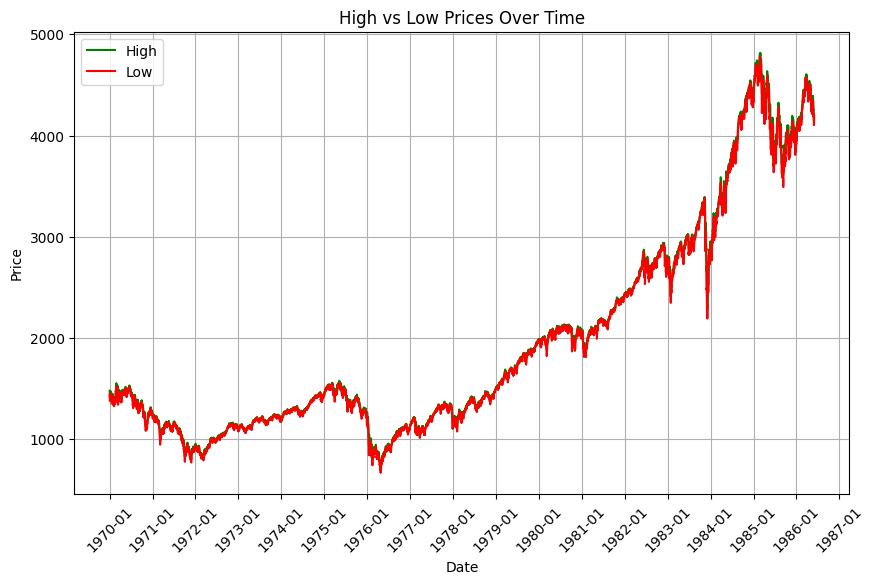

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot High vs Low Prices
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['High'], label='High', color='green')
plt.plot(df['Date'], df['Low'], label='Low', color='red')

# Formatting the x-axis
plt.title('High vs Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Use a DateFormatter to set the date format
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Show one tick per year (adjust if necessary)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as "YYYY-MM"

# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()


## Rolling Mean and Standard Deviation

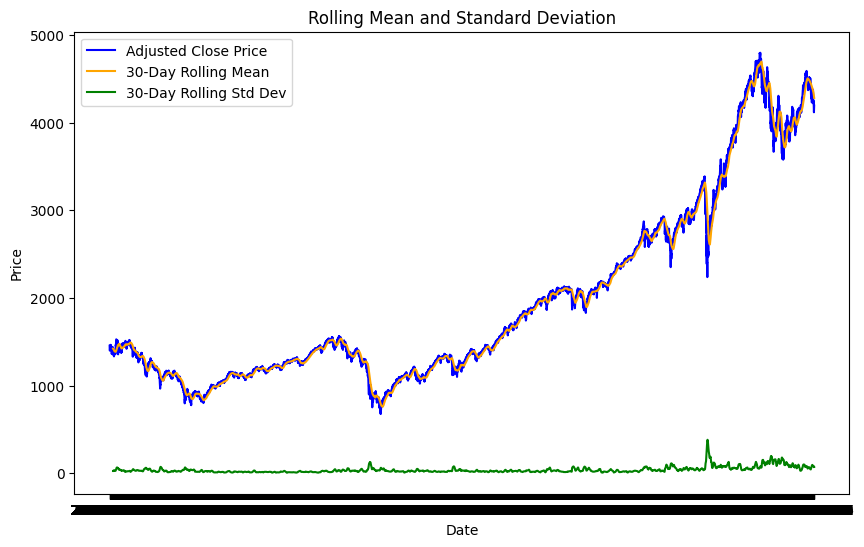

In [20]:
# Calculate rolling mean and standard deviation
rolling_mean = df['Adj Close'].rolling(window=30).mean()
rolling_std = df['Adj Close'].rolling(window=30).std()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj Close'], label='Adjusted Close Price', color='blue')
plt.plot(df['Date'], rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.plot(df['Date'], rolling_std, label='30-Day Rolling Std Dev', color='green')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [21]:
# Add rolling statistics to the dataframe
df_Rolling = df
df_Rolling['Rolling_Mean_30'] = rolling_mean
df_Rolling['Rolling_Std_Dev_30'] = rolling_std

# Display a few rows of the table
rolling_stats_table = df_Rolling[['Date', 'Adj Close', 'Rolling_Mean_30', 'Rolling_Std_Dev_30']]
print(rolling_stats_table.head(70))


          Date    Adj Close  Rolling_Mean_30  Rolling_Std_Dev_30
0   2000-01-03  1455.219971              NaN                 NaN
1   2000-01-04  1399.420044              NaN                 NaN
2   2000-01-05  1402.109985              NaN                 NaN
3   2000-01-06  1403.449951              NaN                 NaN
4   2000-01-07  1441.469971              NaN                 NaN
..         ...          ...              ...                 ...
65  2000-04-05  1487.369995      1435.340662           65.703655
66  2000-04-06  1501.339966      1440.270992           64.889682
67  2000-04-07  1516.349976      1446.370658           63.068470
68  2000-04-10  1504.459961      1451.584322           61.094410
69  2000-04-11  1500.589966      1456.056653           59.536088

[70 rows x 4 columns]


In [22]:
# Summary statistics for rolling mean and standard deviation
summary_stats = df_Rolling[['Rolling_Mean_30', 'Rolling_Std_Dev_30']].describe()
print(summary_stats)


       Rolling_Mean_30  Rolling_Std_Dev_30
count      5967.000000         5967.000000
mean       1951.526465           38.961903
std        1037.625456           34.630951
min         758.492999            6.440265
25%        1190.607829           18.703487
50%        1451.553666           27.566220
75%        2565.395504           46.445172
max        4696.296338          381.951456


In [23]:
# Find dates with highest rolling standard deviation (high volatility)
high_volatility = df_Rolling.loc[df_Rolling['Rolling_Std_Dev_30'].idxmax()]
print("Highest Rolling Std Dev:")
print(high_volatility[['Date', 'Rolling_Std_Dev_30']])

# Find dates with highest rolling mean (highest average price over 30 days)
highest_rolling_mean = df_Rolling.loc[df_Rolling['Rolling_Mean_30'].idxmax()]
print("\nHighest Rolling Mean:")
print(highest_rolling_mean[['Date', 'Rolling_Mean_30']])


Highest Rolling Std Dev:
Date                  2020-03-24
Rolling_Std_Dev_30    381.951456
Name: 5087, dtype: object

Highest Rolling Mean:
Date                2022-01-18
Rolling_Mean_30    4696.296338
Name: 5546, dtype: object


In [24]:
# Sample rolling statistics every 30th row (approximately monthly if data is daily)
sampled_rolling_stats = rolling_stats_table.iloc[::30]
print(sampled_rolling_stats)


            Date    Adj Close  Rolling_Mean_30  Rolling_Std_Dev_30
0     2000-01-03  1455.219971              NaN                 NaN
30    2000-02-15  1402.050049      1419.927999           25.242740
60    2000-03-29  1508.520020      1414.017664           63.926260
90    2000-05-11  1407.810059      1451.708667           40.881014
120   2000-06-23  1441.479980      1443.765662           32.579222
...          ...          ...              ...                 ...
5850  2023-04-04  4100.600098      3980.925675           65.447971
5880  2023-05-17  4158.770020      4123.767342           29.529021
5910  2023-06-30  4450.379883      4294.612988           94.528944
5940  2023-08-14  4489.720215      4504.655990           53.732305
5970  2023-09-26  4273.529785      4428.690658           62.868450

[200 rows x 4 columns]


In [25]:
# Calculate slope of rolling mean
df_Rolling['Rolling_Mean_Change'] = df_Rolling['Rolling_Mean_30'].diff()

# Highlight periods of high volatility
volatility_peaks = df_Rolling[df_Rolling['Rolling_Std_Dev_30'] > df_Rolling['Rolling_Std_Dev_30'].mean() + df_Rolling['Rolling_Std_Dev_30'].std()]
print("Periods with high volatility:")
print(volatility_peaks[['Date', 'Rolling_Std_Dev_30']])


Periods with high volatility:
            Date  Rolling_Std_Dev_30
2204  2008-10-08           81.341455
2205  2008-10-09           94.807616
2206  2008-10-10          105.253067
2207  2008-10-13          107.157554
2208  2008-10-14          108.673126
...          ...                 ...
5990  2023-10-24           76.370238
5991  2023-10-25           76.442761
5992  2023-10-26           75.726425
5993  2023-10-27           78.895979
5994  2023-10-30           76.953004

[679 rows x 2 columns]


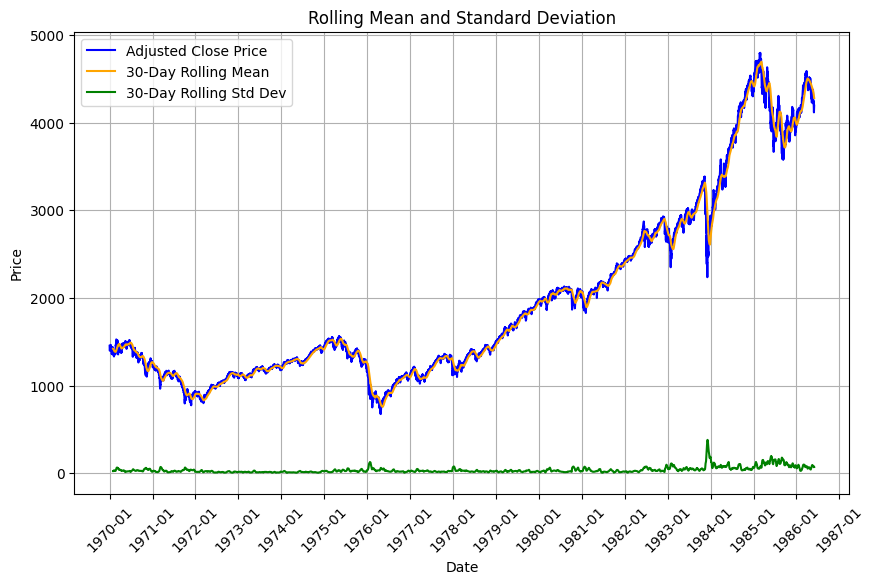

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calculate rolling mean and standard deviation
rolling_mean = df['Adj Close'].rolling(window=30).mean()
rolling_std = df['Adj Close'].rolling(window=30).std()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj Close'], label='Adjusted Close Price', color='blue')
plt.plot(df['Date'], rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.plot(df['Date'], rolling_std, label='30-Day Rolling Std Dev', color='green')

# Formatting the x-axis
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Use a DateFormatter to set the date format
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Show one tick per year (adjust if necessary)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as "YYYY-MM"

# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.grid(True)
plt.show()


## Histogram of Adjusted Close Prices

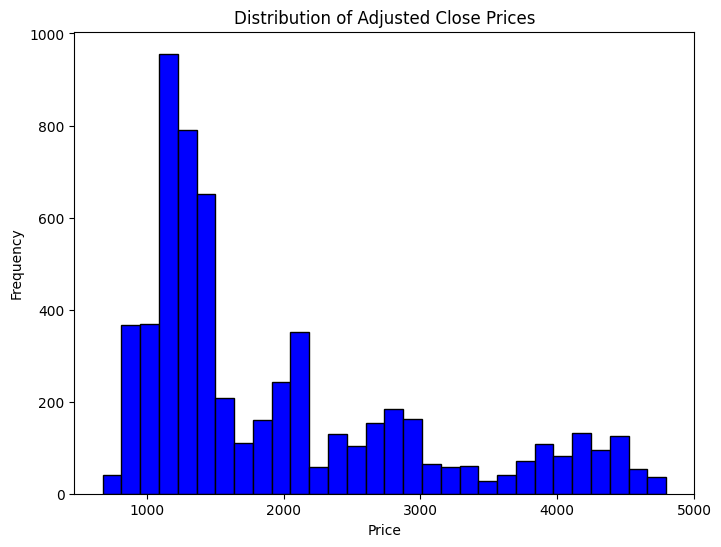

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(df['Adj Close'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Adjusted Close Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [28]:
# Summary statistics for Adjusted Close
adj_close_stats = df['Adj Close'].describe()
print(adj_close_stats)


count    5996.000000
mean     1955.833831
std      1042.872611
min       676.530029
25%      1190.664948
50%      1453.669983
75%      2549.927429
max      4796.560059
Name: Adj Close, dtype: float64


In [29]:
# Bin the Adjusted Close prices
bins = pd.cut(df['Adj Close'], bins=10)  # Adjust 'bins' for finer or coarser granularity
frequency_table = bins.value_counts().sort_index()

# Convert to a DataFrame for readability
frequency_df = pd.DataFrame({
    'Range': frequency_table.index.astype(str),
    'Frequency': frequency_table.values
})
print(frequency_df)


                  Range  Frequency
0    (672.41, 1088.533]        776
1  (1088.533, 1500.536]       2399
2  (1500.536, 1912.539]        478
3  (1912.539, 2324.542]        654
4  (2324.542, 2736.545]        386
5  (2736.545, 3148.548]        412
6  (3148.548, 3560.551]        145
7  (3560.551, 3972.554]        221
8  (3972.554, 4384.557]        309
9   (4384.557, 4796.56]        216


In [30]:
import numpy as np

# Calculate percentiles
percentiles = [0, 10, 25, 50, 75, 90, 100]
adj_close_percentiles = np.percentile(df['Adj Close'], percentiles)

# Create a DataFrame for the percentiles
percentile_table = pd.DataFrame({
    'Percentile': percentiles,
    'Price': adj_close_percentiles
})
print(percentile_table)


   Percentile        Price
0           0   676.530029
1          10  1040.570007
2          25  1190.664948
3          50  1453.669983
4          75  2549.927429
5          90  3898.830078
6         100  4796.560059


In [31]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
skewness = skew(df['Adj Close'].dropna())
kurt = kurtosis(df['Adj Close'].dropna(), fisher=True)

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


Skewness: 1.139197593775216
Kurtosis: 0.15162998001494676


In [32]:
# Calculate IQR
Q1 = df['Adj Close'].quantile(0.25)
Q3 = df['Adj Close'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['Adj Close'] < lower_bound) | (df['Adj Close'] > upper_bound)]
print("Outliers:")
print(outliers[['Date', 'Adj Close']])


Outliers:
            Date    Adj Close
5491  2021-10-28  4596.419922
5492  2021-10-29  4605.379883
5493  2021-11-01  4613.669922
5494  2021-11-02  4630.649902
5495  2021-11-03  4660.569824
5496  2021-11-04  4680.060059
5497  2021-11-05  4697.529785
5498  2021-11-08  4701.700195
5499  2021-11-09  4685.250000
5500  2021-11-10  4646.709961
5501  2021-11-11  4649.270020
5502  2021-11-12  4682.850098
5503  2021-11-15  4682.799805
5504  2021-11-16  4700.899902
5505  2021-11-17  4688.669922
5506  2021-11-18  4704.540039
5507  2021-11-19  4697.959961
5508  2021-11-22  4682.939941
5509  2021-11-23  4690.700195
5510  2021-11-24  4701.459961
5511  2021-11-26  4594.620117
5512  2021-11-29  4655.270020
5517  2021-12-06  4591.669922
5518  2021-12-07  4686.750000
5519  2021-12-08  4701.209961
5520  2021-12-09  4667.450195
5521  2021-12-10  4712.020020
5522  2021-12-13  4668.970215
5523  2021-12-14  4634.089844
5524  2021-12-15  4709.850098
5525  2021-12-16  4668.669922
5526  2021-12-17  4620.640137


## Daily returns

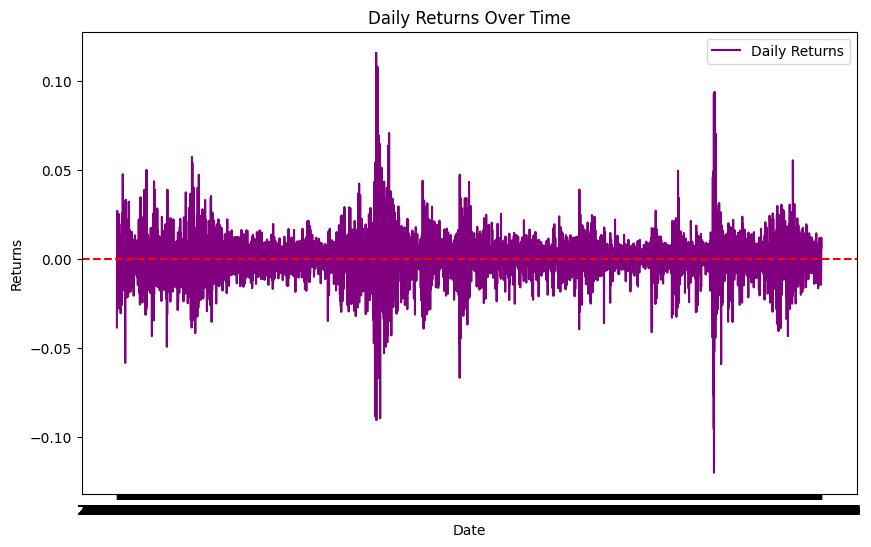

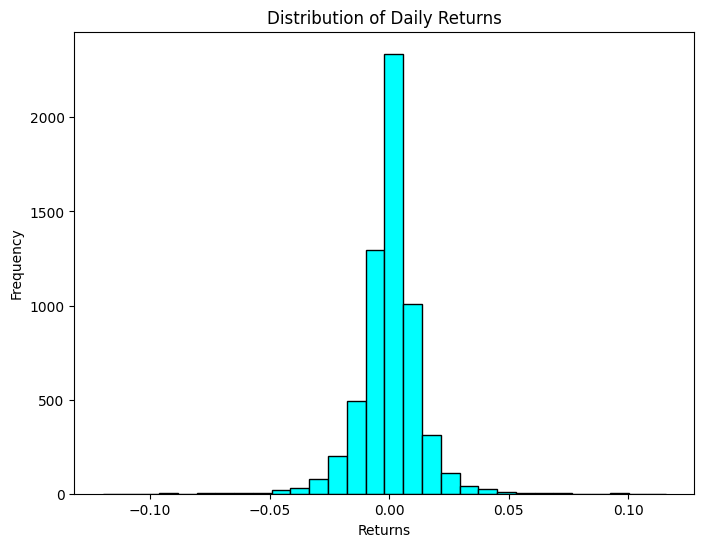

In [33]:
# Calculate daily returns
df_Daily = df
df_Daily['Daily Returns'] = df_Daily['Adj Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(10, 6))
plt.plot(df_Daily['Date'], df_Daily['Daily Returns'], label='Daily Returns', color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Histogram of daily returns
plt.figure(figsize=(8, 6))
plt.hist(df_Daily['Daily Returns'].dropna(), bins=30, color='cyan', edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()


In [34]:
# Summary statistics for Daily Returns
daily_returns_stats = df_Daily['Daily Returns'].describe()
print(daily_returns_stats)


count    5995.000000
mean        0.000253
std         0.012388
min        -0.119841
25%        -0.004888
50%         0.000553
75%         0.005949
max         0.115800
Name: Daily Returns, dtype: float64


In [35]:
# Bin the Daily Returns into ranges
bins = pd.cut(df_Daily['Daily Returns'].dropna(), bins=10)  # Adjust 'bins' for finer or coarser granularity
frequency_table = bins.value_counts().sort_index()

# Convert to a DataFrame for better readability
frequency_df = pd.DataFrame({
    'Range': frequency_table.index.astype(str),
    'Frequency': frequency_table.values
})
print(frequency_df)


                 Range  Frequency
0     (-0.12, -0.0963]          1
1   (-0.0963, -0.0727]          6
2   (-0.0727, -0.0491]         13
3   (-0.0491, -0.0256]        127
4  (-0.0256, -0.00202]       1990
5   (-0.00202, 0.0215]       3661
6     (0.0215, 0.0451]        171
7     (0.0451, 0.0687]         19
8     (0.0687, 0.0922]          3
9      (0.0922, 0.116]          4


In [36]:
# Calculate percentiles for Daily Returns
percentiles = [0, 10, 25, 50, 75, 90, 100]
daily_returns_percentiles = np.percentile(df_Daily['Daily Returns'].dropna(), percentiles)

# Create a DataFrame to display the percentiles
percentile_table = pd.DataFrame({
    'Percentile': percentiles,
    'Return': daily_returns_percentiles
})
print(percentile_table)


   Percentile    Return
0           0 -0.119841
1          10 -0.012968
2          25 -0.004888
3          50  0.000553
4          75  0.005949
5          90  0.012553
6         100  0.115800


In [37]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for Daily Returns
skewness = skew(df_Daily['Daily Returns'].dropna())
kurt = kurtosis(df_Daily['Daily Returns'].dropna(), fisher=True)

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


Skewness: -0.1510475233248226
Kurtosis: 10.031101459165944


In [38]:
# Calculate IQR for Daily Returns
Q1 = df_Daily['Daily Returns'].quantile(0.25)
Q3 = df_Daily['Daily Returns'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df_Daily[(df_Daily['Daily Returns'] < lower_bound) | (df_Daily['Daily Returns'] > upper_bound)]
print("Outliers in Daily Returns:")
print(outliers[['Date', 'Daily Returns']])


Outliers in Daily Returns:
            Date  Daily Returns
1     2000-01-04      -0.038345
4     2000-01-07       0.027090
14    2000-01-24      -0.027634
18    2000-01-28      -0.027457
19    2000-01-31       0.025218
...          ...            ...
5746  2022-11-02      -0.025002
5752  2022-11-10       0.055434
5765  2022-11-30       0.030948
5776  2022-12-15      -0.024922
5790  2023-01-06       0.022841

[422 rows x 2 columns]


# 1. Rolling Statistics

Rolling Mean & Standard Deviation:

These 30-day rolling values offer insights into price trends and volatility.
Highest Rolling Std Dev: On 2020-03-24, standard deviation peaked at 381.95, signaling extreme volatility, likely tied to COVID-19 market shocks.
Highest Rolling Mean: On 2022-01-18, a mean of 4696.30 was observed, reflecting a period of sustained high prices.
High Volatility Periods:

Spikes in volatility were prevalent during the 2008 financial crisis and COVID-19 (e.g., 2008-10-13 had volatility over 100).

# 2. Summary Statistics
Adjusted Close Prices:

Mean: 1955.83, Standard Deviation: 1042.87.
Range: From 676.53 (min) to 4796.56 (max).
The 75th percentile price (2549.93) shows that the majority of prices are well below the max.
Daily Returns:

Mean: 0.00025 (negligible average daily growth), Std Dev: 0.0124.
Max Return: 11.58%, Min Return: -11.98%, showing occasional extreme movements.

# 3. Distribution Insights
Price Binning:

Most prices (2,399 occurrences) fall in the 1088.53–1500.54 range, indicating a concentration around lower historical prices.
Extreme prices above 4384.56 are rare, with only 216 occurrences.
Daily Returns:

Over 60% of returns fall between -0.00202 and 0.0215, showing limited daily fluctuations.
Outlier returns like >5% or <-5% are rare (e.g., 0.27% of occurrences).

# 4. Percentile Analysis
Price Percentiles:
The 90th percentile price is 3898.83, while the max is 4796.56—indicating rare extreme highs.
Returns Percentiles:
Returns above 1.25% daily occur less than 10% of the time.
Median daily return is nearly flat at 0.05%.

# 5. Volatility & Trend Analysis
Skewness:

Adjusted Close Prices: Skewed right (1.14), indicating a long tail of higher prices.
Daily Returns: Slightly skewed left (-0.15), showing a mild tendency for negative extremes.
Kurtosis:

Adjusted Close Prices: Low kurtosis (0.15) suggests close-to-normal price distribution.
Daily Returns: High kurtosis (10.03) reveals frequent extreme returns compared to a normal distribution.

# 6. Outlier Analysis
Price Outliers:

Outliers primarily appear between 2021-10 and 2023-07, corresponding to market highs.
Top price observed: 4796.56 on 2022-01-03.
Daily Return Outliers:

422 outliers, mostly clustered around major financial crises or sudden market recoveries (e.g., COVID-19 rebounds).

# 7. Key Takeaways
Market Cyclicality: Rolling means highlight long-term trends, with major peaks in the early 2020s. High volatility in 2008 and 2020 aligns with macroeconomic events.
Stable Growth with Rare Shocks: Daily returns show consistent growth punctuated by rare, extreme movements.
Price Distribution: Most prices are concentrated in a specific range, with fewer instances of extreme highs or lows.

## Candlestick chart

/home/moraa-ontita/Documents/Machine-learning/Stock_Price_Prediction/venv/lib/python3.12/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


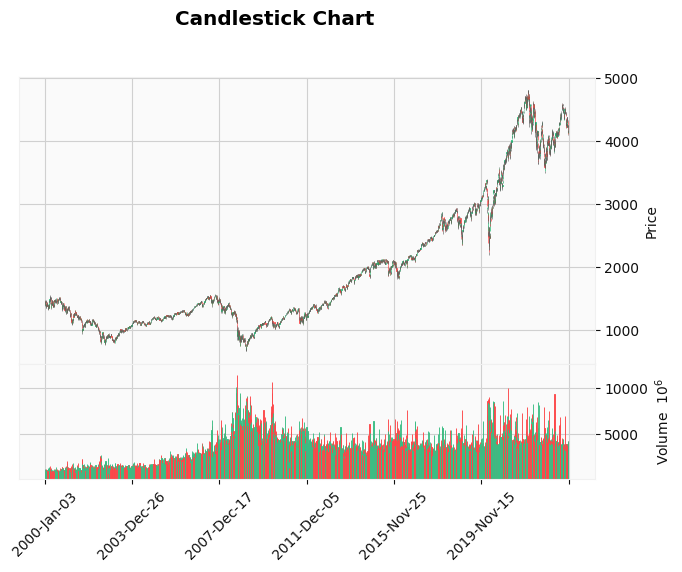

In [39]:
import pandas as pd
import mplfinance as mpf

# Example DataFrame setup
df['Date'] = pd.to_datetime(df['Date'])
df.columns = df.columns.str.strip()  # Remove any whitespace
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')  # Ensure numeric

# Prepare candlestick data
candlestick_data = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].set_index('Date')

# Plot candlestick chart
mpf.plot(candlestick_data, type='candle', volume=True, title='Candlestick Chart', style='yahoo')


/tmp/ipykernel_412102/1744180409.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Date'] = pd.to_datetime(df_recent['Date'])
/tmp/ipykernel_412102/1744180409.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Volume'] = pd.to_numeric(df_recent['Volume'], errors='coerce')  # Ensure numeric


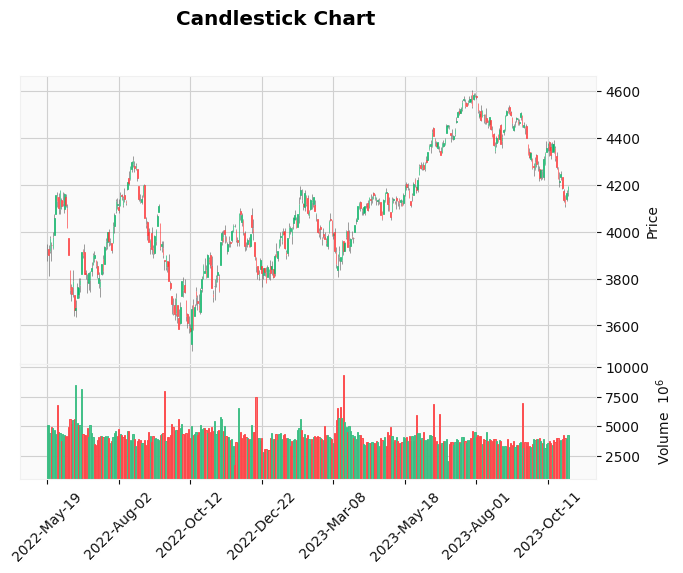

In [40]:
import pandas as pd
import mplfinance as mpf

# Example DataFrame setup
df_recent = df.tail(365)
df_recent['Date'] = pd.to_datetime(df_recent['Date'])
df_recent.columns = df_recent.columns.str.strip()  # Remove any whitespace
df_recent['Volume'] = pd.to_numeric(df_recent['Volume'], errors='coerce')  # Ensure numeric

# Prepare candlestick data
candlestick_data = df_recent[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].set_index('Date')

# Plot candlestick chart
mpf.plot(candlestick_data, type='candle', volume=True, title='Candlestick Chart', style='yahoo')


In [41]:
# Calculate daily price change (Open to Close)

df_Price_Change = df
df_Price_Change['Price Change'] = df_Price_Change['Close'] - df_Price_Change['Open']

# Calculate daily return
df_Price_Change['Daily Return'] = df_Price_Change['Price Change'] / df_Price_Change['Open']

# Summary statistics for price change and daily return
price_change_stats = df_Price_Change[['Price Change', 'Daily Return']].describe()
print(price_change_stats)


       Price Change  Daily Return
count   5996.000000   5996.000000
mean       0.218748      0.000169
std       21.087104      0.011296
min     -150.220215     -0.087231
25%       -7.810059     -0.004598
50%        0.890015      0.000514
75%        9.100006      0.005437
max      149.539795      0.107890


In [42]:
# Identify bullish and bearish days
df_Bullish_Bearish = df


df_Bullish_Bearish['Bullish Day'] = df_Bullish_Bearish['Close'] > df_Bullish_Bearish['Open']
df_Bullish_Bearish['Bearish Day'] = df_Bullish_Bearish['Close'] < df_Bullish_Bearish['Open']

# Calculate the percentage of bullish and bearish days
bullish_percentage = df_Bullish_Bearish['Bullish Day'].mean() * 100
bearish_percentage = df_Bullish_Bearish['Bearish Day'].mean() * 100

print(f'Bullish Days Percentage: {bullish_percentage:.2f}%')
print(f'Bearish Days Percentage: {bearish_percentage:.2f}%')


Bullish Days Percentage: 53.24%
Bearish Days Percentage: 46.71%


In [43]:
# Define a function to identify Doji pattern
def is_doji(row):
    return abs(row['Close'] - row['Open']) / (row['High'] - row['Low']) < 0.1

# Apply the function to the dataframe
df['Doji'] = df.apply(is_doji, axis=1)

# Count the number of Doji days
doji_days = df['Doji'].sum()
print(f'Number of Doji Days: {doji_days}')


Number of Doji Days: 546


In [44]:
# Calculate 50-day moving average
df_50_200_Day = df

df_50_200_Day['50-Day SMA'] = df_50_200_Day['Close'].rolling(window=50).mean()

# Calculate 200-day moving average
df_50_200_Day['200-Day SMA'] = df_50_200_Day['Close'].rolling(window=200).mean()

# Summary statistics for moving averages
moving_avg_stats = df_50_200_Day[['50-Day SMA', '200-Day SMA']].describe()
print(moving_avg_stats)


        50-Day SMA  200-Day SMA
count  5947.000000  5797.000000
mean   1948.393060  1924.110296
std    1033.620713  1003.875348
min     788.956798   870.572500
25%    1192.022900  1176.970696
50%    1445.958999  1437.740147
75%    2569.253411  2523.047158
max    4681.011611  4496.905588


In [45]:
# Calculate the highest high and lowest low over the past 30 days
df_30_Day = df

df_30_Day['30-Day High'] = df_30_Day['High'].rolling(window=30).max()
df_30_Day['30-Day Low'] = df_30_Day['Low'].rolling(window=30).min()

# Display the last few rows of the key price levels
print(df_30_Day[['Date', '30-Day High', '30-Day Low']].tail())


           Date  30-Day High   30-Day Low
5991 2023-10-25  4511.990234  4181.419922
5992 2023-10-26  4497.979980  4127.899902
5993 2023-10-27  4466.359863  4103.779785
5994 2023-10-30  4461.029785  4103.779785
5995 2023-10-31  4461.029785  4103.779785


In [46]:
# Calculate the standard deviation of daily returns (volatility)
daily_volatility = df_Price_Change['Daily Return'].std()

print(f'Daily Volatility: {daily_volatility:.4f}')


Daily Volatility: 0.0113


## Moving Averages

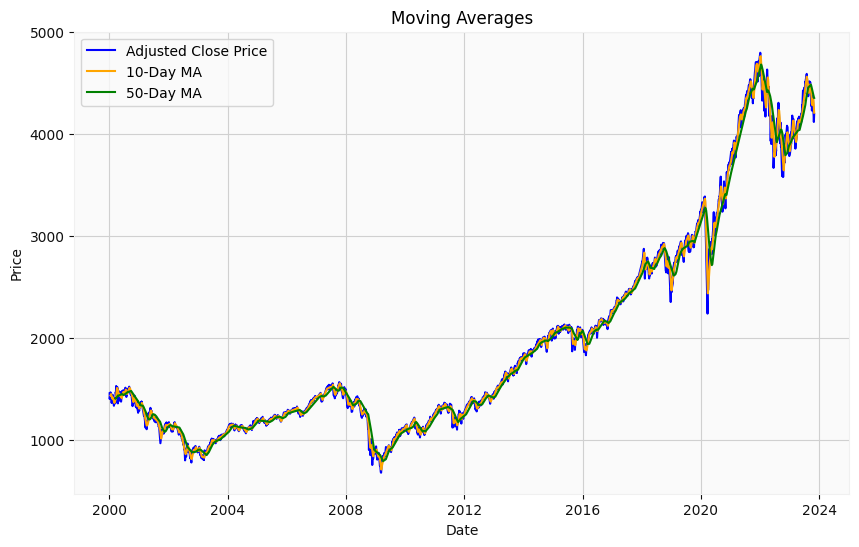

In [47]:
# Calculate moving averages
df['Short MA'] = df['Adj Close'].rolling(window=10).mean()
df['Long MA'] = df['Adj Close'].rolling(window=50).mean()

# Plot moving averages
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj Close'], label='Adjusted Close Price', color='blue')
plt.plot(df['Date'], df['Short MA'], label='10-Day MA', color='orange')
plt.plot(df['Date'], df['Long MA'], label='50-Day MA', color='green')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [48]:
# Calculate the short-term (10-day) and long-term (50-day) moving averages
df_Short_Long = df

df_Short_Long['Short MA'] = df_Short_Long['Adj Close'].rolling(window=10).mean()
df_Short_Long['Long MA'] = df_Short_Long['Adj Close'].rolling(window=50).mean()

# Display the DataFrame with moving averages
moving_avg_table = df_Short_Long[['Date', 'Adj Close', 'Short MA', 'Long MA']]
print(moving_avg_table.tail())  # Show the last few rows


           Date    Adj Close     Short MA      Long MA
5991 2023-10-25  4186.770020  4289.247021  4371.934414
5992 2023-10-26  4137.229980  4268.009033  4366.592412
5993 2023-10-27  4117.370117  4246.968066  4361.532617
5994 2023-10-30  4166.819824  4226.287061  4357.474814
5995 2023-10-31  4193.799805  4208.347021  4353.355410


In [49]:
# Calculate when the short MA crosses the long MA (bullish crossover = short MA above long MA)
df_Short_Long['Crossover'] = df_Short_Long['Short MA'] > df_Short_Long['Long MA']
df_Short_Long['Crossover Signal'] = df_Short_Long['Crossover'].diff()

# Find the crossover points (where the signal changes)
crossover_points = df_Short_Long[df_Short_Long['Crossover Signal'].notna()]
print("Crossover Points:")
print(crossover_points[['Date', 'Adj Close', 'Short MA', 'Long MA', 'Crossover Signal']])


Crossover Points:
           Date    Adj Close     Short MA      Long MA Crossover Signal
1    2000-01-04  1399.420044          NaN          NaN            False
2    2000-01-05  1402.109985          NaN          NaN            False
3    2000-01-06  1403.449951          NaN          NaN            False
4    2000-01-07  1441.469971          NaN          NaN            False
5    2000-01-10  1457.599976          NaN          NaN            False
...         ...          ...          ...          ...              ...
5991 2023-10-25  4186.770020  4289.247021  4371.934414            False
5992 2023-10-26  4137.229980  4268.009033  4366.592412            False
5993 2023-10-27  4117.370117  4246.968066  4361.532617            False
5994 2023-10-30  4166.819824  4226.287061  4357.474814            False
5995 2023-10-31  4193.799805  4208.347021  4353.355410            False

[5995 rows x 5 columns]


In [50]:
# Calculate the difference between short-term and long-term moving averages
df_Short_Long['MA Difference'] = df_Short_Long['Short MA'] - df_Short_Long['Long MA']

# Display the summary of the moving average differences
ma_difference_summary = df_Short_Long[['Date', 'MA Difference']].describe()
print(ma_difference_summary)


                                Date  MA Difference
count                           5996    5947.000000
mean   2011-12-03 09:21:15.250166784       9.881303
min              2000-01-03 00:00:00    -622.506416
25%              2005-12-18 06:00:00     -17.174900
50%              2011-11-30 12:00:00      15.871399
75%              2017-11-14 06:00:00      43.600303
max              2023-10-31 00:00:00     268.100889
std                              NaN      70.568321


In [51]:
# Calculate the rate of change (slope) for short and long moving averages
df_Short_Long['Short MA Slope'] = df_Short_Long['Short MA'].diff()
df_Short_Long['Long MA Slope'] = df_Short_Long['Long MA'].diff()

# Display the summary statistics for slopes
ma_slope_summary = df_Short_Long[['Date', 'Short MA Slope', 'Long MA Slope']].describe()
print(ma_slope_summary)


                                Date  Short MA Slope  Long MA Slope
count                           5996     5986.000000    5946.000000
mean   2011-12-03 09:21:15.250166784        0.463391       0.496318
min              2000-01-03 00:00:00      -73.202002     -20.746001
25%              2005-12-18 06:00:00       -2.143495      -0.654299
50%              2011-11-30 12:00:00        0.946997       0.730599
75%              2017-11-14 06:00:00        3.502748       1.851249
max              2023-10-31 00:00:00       42.628003      17.709404
std                              NaN        7.229568       2.935982


In [52]:
# Summary statistics for short and long moving averages
moving_avg_summary = df_Short_Long[['Short MA', 'Long MA']].describe()
print(moving_avg_summary)


          Short MA      Long MA
count  5987.000000  5947.000000
mean   1954.561138  1948.393060
std    1041.334231  1033.620713
min     707.927002   788.956798
25%    1191.488000  1192.022900
50%    1449.322998  1445.958999
75%    2546.941492  2569.253411
max    4762.854053  4681.011611


## Volume Trends

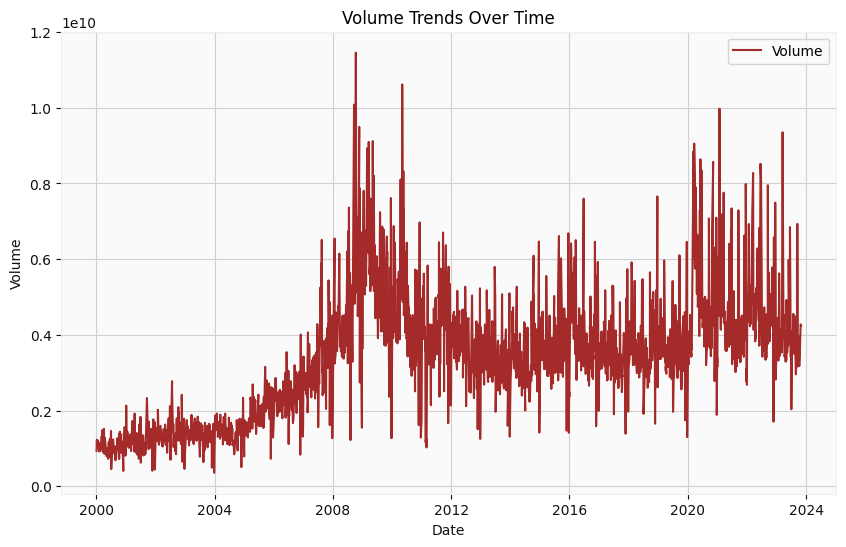

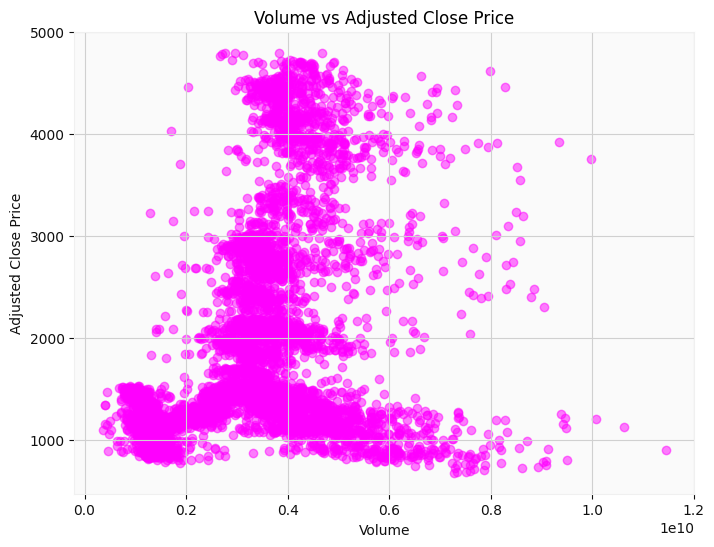

In [53]:
# Volume over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='brown')
plt.title('Volume Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Volume-Price Relationship
plt.figure(figsize=(8, 6))
plt.scatter(df['Volume'], df['Adj Close'], alpha=0.5, color='magenta')
plt.title('Volume vs Adjusted Close Price')
plt.xlabel('Volume')
plt.ylabel('Adjusted Close Price')
plt.show()


In [54]:
# Summary statistics for Volume
volume_stats = df['Volume'].describe()
print(volume_stats)


count    5.996000e+03
mean     3.322962e+09
std      1.511115e+09
min      3.560700e+08
25%      2.074988e+09
50%      3.438740e+09
75%      4.157938e+09
max      1.145623e+10
Name: Volume, dtype: float64


In [55]:
# Find the days with the highest and lowest volume
highest_volume_day = df.loc[df['Volume'].idxmax()]
lowest_volume_day = df.loc[df['Volume'].idxmin()]

print("Highest Volume Day:", highest_volume_day[['Date', 'Volume']])
print("Lowest Volume Day:", lowest_volume_day[['Date', 'Volume']])


Highest Volume Day: Date      2008-10-10 00:00:00
Volume            11456230000
Name: 2206, dtype: object
Lowest Volume Day: Date      2003-12-26 00:00:00
Volume              356070000
Name: 1000, dtype: object


In [56]:
# Calculate 30-day rolling average of volume
df_30_Day = df

df_30_Day['30-Day Volume MA'] = df_30_Day['Volume'].rolling(window=30).mean()

# Summary statistics for the rolling average volume
volume_ma_summary = df_30_Day[['Date', '30-Day Volume MA']].describe()
print(volume_ma_summary)


                                Date  30-Day Volume MA
count                           5996      5.967000e+03
mean   2011-12-03 09:21:15.250166784      3.327219e+09
min              2000-01-03 00:00:00      8.921133e+08
25%              2005-12-18 06:00:00      2.218939e+09
50%              2011-11-30 12:00:00      3.529730e+09
75%              2017-11-14 06:00:00      4.109623e+09
max              2023-10-31 00:00:00      7.379502e+09
std                              NaN      1.370695e+09


In [57]:
# Calculate correlation between Volume and Adjusted Close
volume_price_corr = df[['Volume', 'Adj Close']].corr()
print("Correlation between Volume and Adjusted Close Price:")
print(volume_price_corr)


Correlation between Volume and Adjusted Close Price:
             Volume  Adj Close
Volume     1.000000   0.344008
Adj Close  0.344008   1.000000


In [58]:
# Calculate rolling 30-day correlation between Volume and Adjusted Close Price
df_30_Day['30-Day Rolling Corr'] = df_30_Day['Volume'].rolling(window=30).corr(df['Adj Close'])

# Display the last few rows of rolling correlation
print(df_30_Day[['Date', '30-Day Rolling Corr']].tail())


           Date  30-Day Rolling Corr
5991 2023-10-25             0.094142
5992 2023-10-26             0.048196
5993 2023-10-27            -0.706264
5994 2023-10-30            -0.666759
5995 2023-10-31            -0.710982


In [59]:
# Calculate percentiles for Volume and Adjusted Close Price
volume_percentiles = np.percentile(df_30_Day['Volume'].dropna(), [0, 25, 50, 75, 100])
price_percentiles = np.percentile(df_30_Day['Adj Close'].dropna(), [0, 25, 50, 75, 100])

# Display percentiles for both
percentile_table = pd.DataFrame({
    'Volume Percentiles': volume_percentiles,
    'Price Percentiles': price_percentiles
})

print(percentile_table)


   Volume Percentiles  Price Percentiles
0        3.560700e+08         676.530029
1        2.074988e+09        1190.664948
2        3.438740e+09        1453.669983
3        4.157938e+09        2549.927429
4        1.145623e+10        4796.560059


In [60]:
from scipy.stats import zscore

# Calculate Z-scores for Volume and Adjusted Close Price
df_Zscore['Volume Z-Score'] = zscore(df_Zscore['Volume'].dropna())
df_Zscore['Price Z-Score'] = zscore(df_Zscore['Adj Close'].dropna())

# Identify outliers (e.g., Z-score greater than 3 or less than -3)
volume_outliers = df_Zscore[df_Zscore['Volume Z-Score'].abs() > 3]
price_outliers = df_Zscore[df_Zscore['Price Z-Score'].abs() > 3]

print("Volume Outliers:")
print(volume_outliers[['Date', 'Volume']])
print("Price Outliers:")
print(price_outliers[['Date', 'Adj Close']])


Volume Outliers:
           Date       Volume
2187 2008-09-15   8279510000
2188 2008-09-16   9459830000
2189 2008-09-17   9431870000
2190 2008-09-18  10082690000
2191 2008-09-19   9387170000
2202 2008-10-06   7956020000
2204 2008-10-08   8716330000
2206 2008-10-10  11456230000
2208 2008-10-14   8161990000
2210 2008-10-16   7984500000
2235 2008-11-20   9093740000
2236 2008-11-21   9495900000
2237 2008-11-24   7879440000
2296 2009-02-20   8210590000
2301 2009-02-27   8926480000
2302 2009-03-02   7868290000
2308 2009-03-10   8618330000
2312 2009-03-16   7883540000
2314 2009-03-18   9098450000
2315 2009-03-19   9033870000
2348 2009-05-06   8555040000
2349 2009-05-07   9120100000
2350 2009-05-08   8163280000
2358 2009-05-20   8205060000
2586 2010-04-16   8108470000
2600 2010-05-06  10617810000
2601 2010-05-07   9472910000
2610 2010-05-20   8328570000
5070 2020-02-28   8569570000
5076 2020-03-09   8441290000
5079 2020-03-12   8850810000
5080 2020-03-13   8299070000
5082 2020-03-17   83702500

# 1. Price Movement Insights
Daily Returns:
Average return is nearly flat, indicating no strong bias toward consistent up or down movements.
High standard deviation suggests significant variability in daily returns, highlighting market volatility.
Bullish vs. Bearish Days:
Bullish days occur slightly more often (53.24%) than bearish days (46.71%), indicating a marginal upward bias.

# 2. Candlestick Patterns
Doji Patterns:
~546 days (~9% of the dataset) exhibit Doji candlesticks, representing indecision in the market. These often precede major price movements, making them potential signals for traders.

# 3. Moving Averages and Crossovers
Moving Average Trends:
50-day and 200-day SMAs show long-term price growth over the dataset's span.
Bullish and bearish crossovers between short (10-day) and long (50-day) averages provide entry/exit signals. You could analyze the performance of these signals.
SMA Difference:
Positive mean SMA differences suggest the market generally trends higher short-term compared to the longer term.

# 4. Volatility and Risk
Daily Volatility:
Daily return standard deviation (0.0113) quantifies market risk. A high volatility period might indicate uncertainty or speculative activity.
Z-Scores:
Volume exhibits significant outliers during major events (e.g., financial crises in 2008, COVID-19). Adjusted close prices, however, have fewer extreme movements relative to their trend.

# 5. Key Price Levels
30-Day Highs/Lows:
These levels serve as support/resistance points and help identify breakout scenarios.

# 6. Volume Trends and Correlations
Volume and Price Correlation:
Positive correlation (0.34) suggests that price increases are often accompanied by higher trading activity, though not strongly so.
Outliers:
Significant volume spikes during major events point to increased market activity, possibly reflecting heightened investor interest or panic.

# 7. Percentiles and Benchmarks
Volume and Price Percentiles:
Help contextualize current data against historical norms. For example, being above the 75th percentile might indicate an unusually high volume or price level.

# 8. Rolling Averages and Correlations
30-Day Rolling Correlation:
Indicates dynamic relationships between volume and price. Negative correlations, like those in the most recent periods, might suggest inverse relationships, often tied to market stress.

## Comparative Analysis

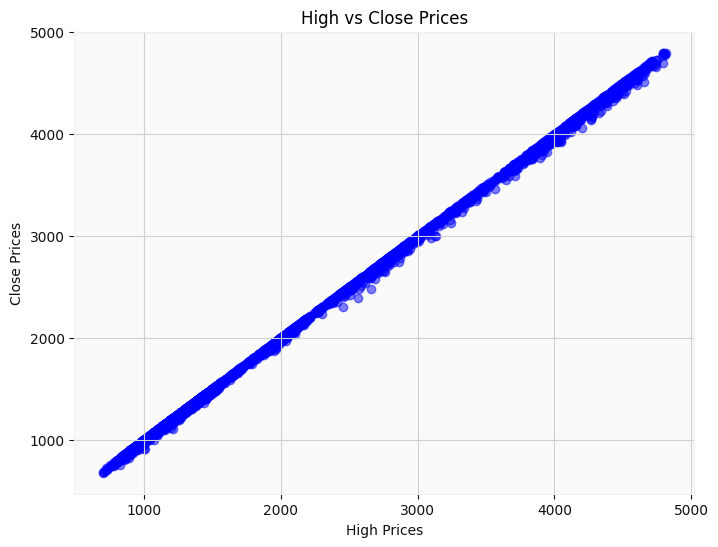

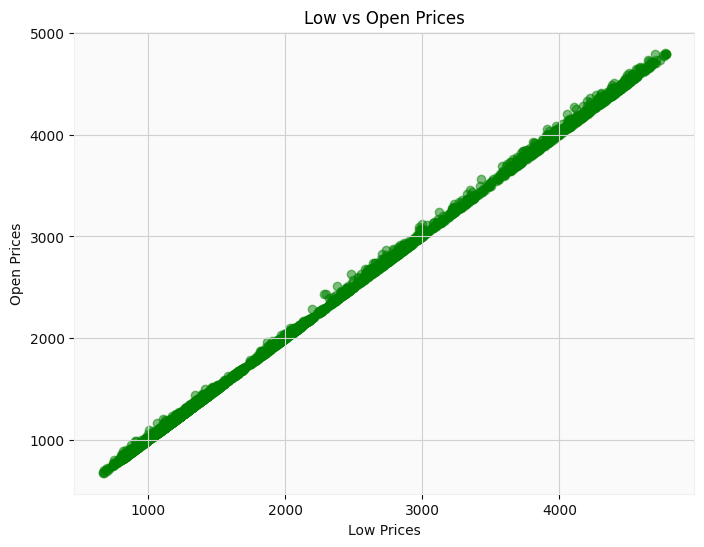

In [61]:
# High vs Close Prices
plt.figure(figsize=(8, 6))
plt.scatter(df['High'], df['Close'], alpha=0.5, color='blue')
plt.title('High vs Close Prices')
plt.xlabel('High Prices')
plt.ylabel('Close Prices')
plt.show()

# Low vs Open Prices
plt.figure(figsize=(8, 6))
plt.scatter(df['Low'], df['Open'], alpha=0.5, color='green')
plt.title('Low vs Open Prices')
plt.xlabel('Low Prices')
plt.ylabel('Open Prices')
plt.show()


In [62]:
# Calculate correlation for High vs Close
high_close_corr = df[['High', 'Close']].corr()

# Calculate correlation for Low vs Open
low_open_corr = df[['Low', 'Open']].corr()

print("Correlation between High and Close Prices:")
print(high_close_corr)

print("\nCorrelation between Low and Open Prices:")
print(low_open_corr)


Correlation between High and Close Prices:
           High     Close
High   1.000000  0.999893
Close  0.999893  1.000000

Correlation between Low and Open Prices:
           Low      Open
Low   1.000000  0.999884
Open  0.999884  1.000000


In [63]:
# Calculate differences
df_difference_stats = df

df_difference_stats['High - Close'] = df_difference_stats['High'] - df_difference_stats['Close']
df_difference_stats['Low - Open'] = df_difference_stats['Low'] - df_difference_stats['Open']

# Summary statistics for the differences
difference_stats = df_difference_stats[['High - Close', 'Low - Open']].describe()
print("Summary Statistics for High - Close and Low - Open Differences:")
print(difference_stats)


Summary Statistics for High - Close and Low - Open Differences:
       High - Close   Low - Open
count   5996.000000  5996.000000
mean      11.365139   -12.509773
std       16.173161    16.816578
min        0.000000  -164.420410
25%        2.109985   -15.762512
50%        5.994995    -7.299927
75%       13.909988    -2.327484
max      180.310059     0.000000


In [64]:
# Calculate ratios
df_difference_stats['High/Close Ratio'] = df_difference_stats['High'] / df_difference_stats['Close']
df_difference_stats['Low/Open Ratio'] = df_difference_stats['Low'] / df_difference_stats['Open']

# Summary statistics for the ratios
ratio_stats = df_difference_stats[['High/Close Ratio', 'Low/Open Ratio']].describe()
print("Summary Statistics for High/Close and Low/Open Ratios:")
print(ratio_stats)


Summary Statistics for High/Close and Low/Open Ratios:
       High/Close Ratio  Low/Open Ratio
count       5996.000000     5996.000000
mean           1.006266        0.993185
std            0.008146        0.008342
min            1.000000        0.908898
25%            1.001222        0.990634
50%            1.003374        0.995683
75%            1.008334        0.998689
max            1.104767        1.000000


In [65]:
# Identify days with extreme differences
extreme_high_close = df_difference_stats[df_difference_stats['High - Close'] > df_difference_stats['High - Close'].mean() + 2 * df_difference_stats['High - Close'].std()]
extreme_low_open = df_difference_stats[df_difference_stats['Low - Open'] > df_difference_stats['Low - Open'].mean() + 2 * df_difference_stats['Low - Open'].std()]

print("Days with Extreme High vs Close Differences:")
print(extreme_high_close[['Date', 'High', 'Close', 'High - Close']])

print("\nDays with Extreme Low vs Open Differences:")
print(extreme_low_open[['Date', 'Low', 'Open', 'Low - Open']])


Days with Extreme High vs Close Differences:
           Date         High        Close  High - Close
1    2000-01-04  1455.219971  1399.420044     55.799927
14   2000-01-24  1454.089966  1401.530029     52.559937
72   2000-04-14  1440.510010  1356.560059     83.949951
197  2000-10-12  1374.930054  1329.780029     45.150024
299  2001-03-12  1233.420044  1180.160034     53.260010
...         ...          ...          ...           ...
5986 2023-10-18  4364.200195  4314.600098     49.600098
5987 2023-10-19  4339.540039  4278.000000     61.540039
5988 2023-10-20  4276.560059  4224.160156     52.399902
5991 2023-10-25  4232.419922  4186.770020     45.649902
5992 2023-10-26  4183.600098  4137.229980     46.370117

[269 rows x 4 columns]

Days with Extreme Low vs Open Differences:
Empty DataFrame
Columns: [Date, Low, Open, Low - Open]
Index: []


In [66]:
# Calculate Z-scores for the differences
from scipy.stats import zscore

df_difference_stats['High - Close Z'] = zscore(df_difference_stats['High - Close'])
df_difference_stats['Low - Open Z'] = zscore(df_difference_stats['Low - Open'])

# Identify outliers
high_close_outliers = df_difference_stats[df_difference_stats['High - Close Z'].abs() > 3]
low_open_outliers = df_difference_stats[df_difference_stats['Low - Open Z'].abs() > 3]

print("High vs Close Outliers:")
print(high_close_outliers[['Date', 'High', 'Close', 'High - Close Z']])

print("\nLow vs Open Outliers:")
print(low_open_outliers[['Date', 'Low', 'Open', 'Low - Open Z']])


High vs Close Outliers:
           Date         High        Close  High - Close Z
72   2000-04-14  1440.510010  1356.560059        4.488354
2197 2008-09-29  1209.069946  1106.420044        5.644684
2203 2008-10-07  1072.910034   996.229980        4.038812
2205 2008-10-09  1005.250000   909.919983        5.192051
2209 2008-10-15   994.599976   907.840027        4.662113
...         ...          ...          ...             ...
5841 2023-03-22  4039.489990  3936.969971        5.636652
5928 2023-07-27  4607.069824  4537.410156        3.604700
5934 2023-08-04  4540.339844  4478.029785        3.150229
5948 2023-08-24  4458.299805  4376.310059        4.367142
5987 2023-10-19  4339.540039  4278.000000        3.102615

[132 rows x 4 columns]

Low vs Open Outliers:
           Date          Low         Open  Low - Open Z
64   2000-04-04  1416.410034  1505.979980     -4.582775
72   2000-04-14  1339.400024  1440.510010     -5.269062
2197 2008-09-29  1106.420044  1209.069946     -5.360641
2202 2008

In [67]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Volume_Zscore,High_Low_Difference,High_Low_Ratio,...,30-Day Volume MA,30-Day Rolling Corr,Volume Z-Score,Price Z-Score,High - Close,Low - Open,High/Close Ratio,Low/Open Ratio,High - Close Z,Low - Open Z
0,2000-01-03,1455.219971,1455.219971,1478.000000,1438.359985,1469.250000,931800000,-1.582383,39.640015,1.027559,...,NaN,NaN,-1.582515,-0.480074,22.780029,-30.890015,1.015654,0.978976,0.705851,-1.093075
1,2000-01-04,1399.420044,1399.420044,1455.219971,1397.430054,1455.219971,1009000000,-1.531294,57.789917,1.041354,...,NaN,NaN,-1.531422,-0.533584,55.799927,-57.789917,1.039874,0.960288,2.747669,-2.692814
2,2000-01-05,1402.109985,1402.109985,1413.270020,1377.680054,1399.420044,1085500000,-1.480670,35.589966,1.025833,...,NaN,NaN,-1.480793,-0.531004,11.160034,-21.739990,1.007959,0.984465,-0.012683,-0.548922
3,2000-01-06,1403.449951,1403.449951,1411.900024,1392.099976,1402.109985,1092300000,-1.476170,19.800049,1.014223,...,NaN,NaN,-1.476293,-0.529719,8.450073,-10.010010,1.006021,0.992861,-0.180256,0.148661
4,2000-01-07,1441.469971,1441.469971,1441.469971,1400.729980,1403.449951,1225200000,-1.388221,40.739990,1.029085,...,NaN,NaN,-1.388337,-0.493259,0.000000,-2.719971,1.000000,0.998062,-0.702775,0.582200


## Boxplot for Outlier Detection

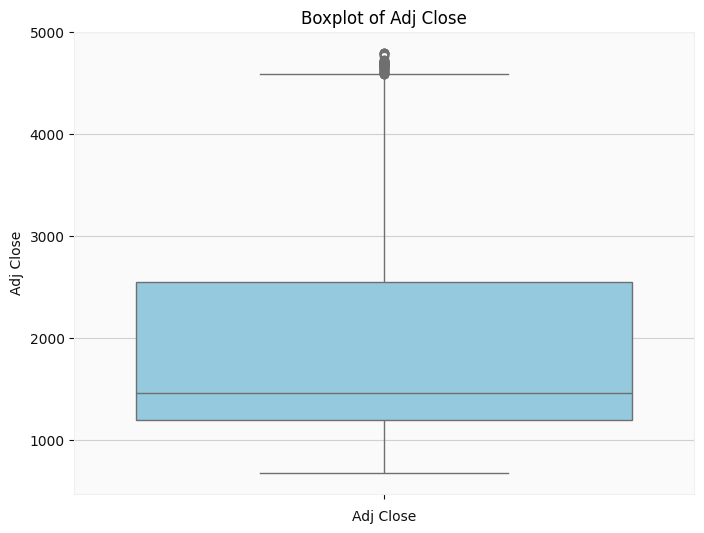

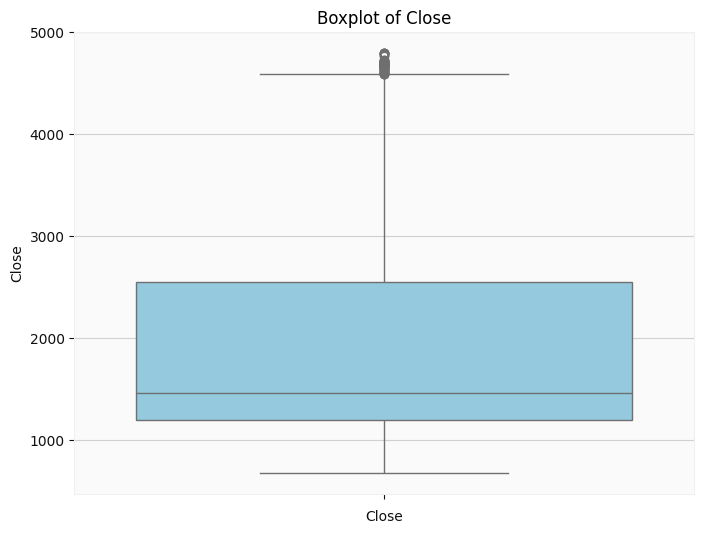

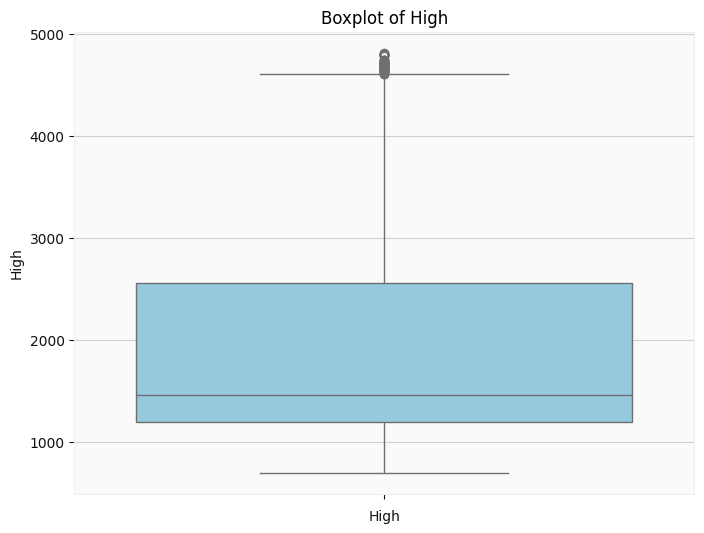

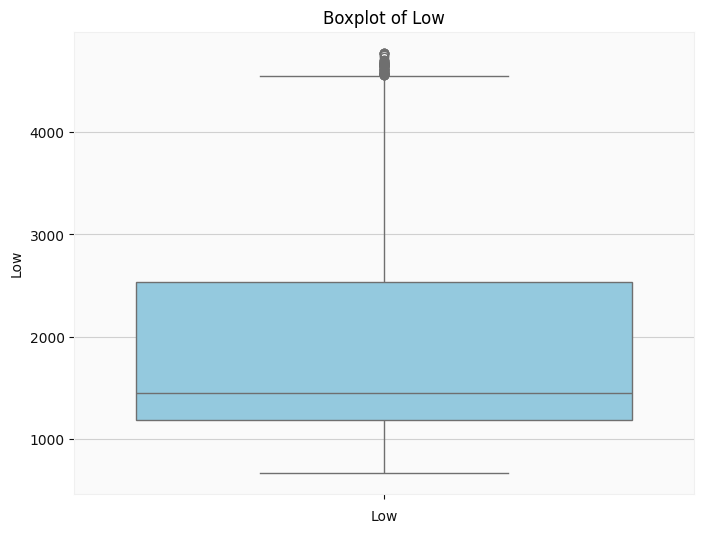

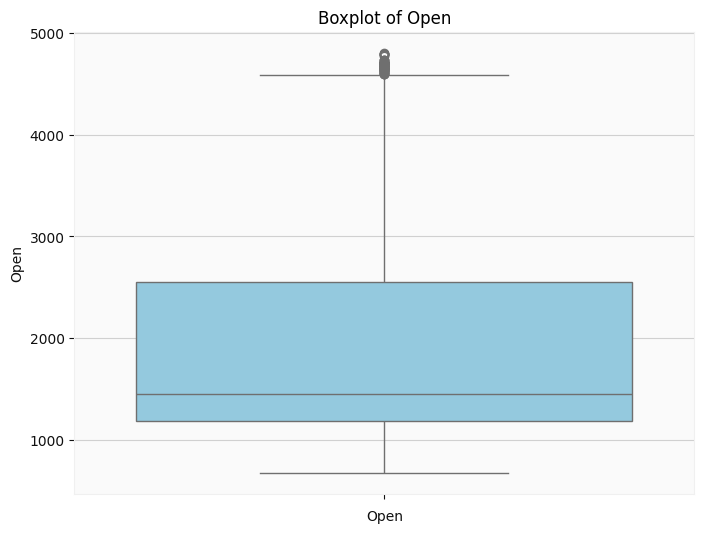

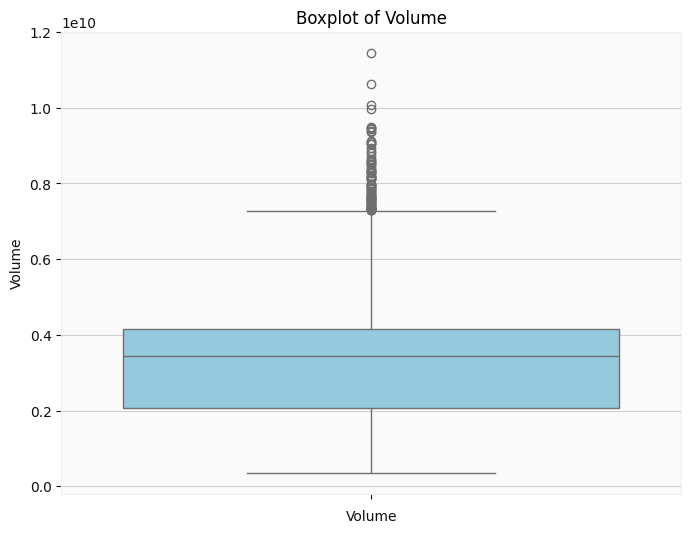

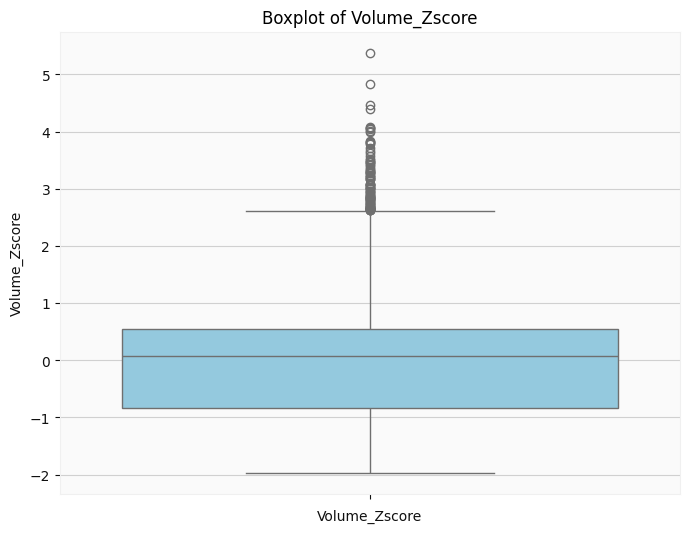

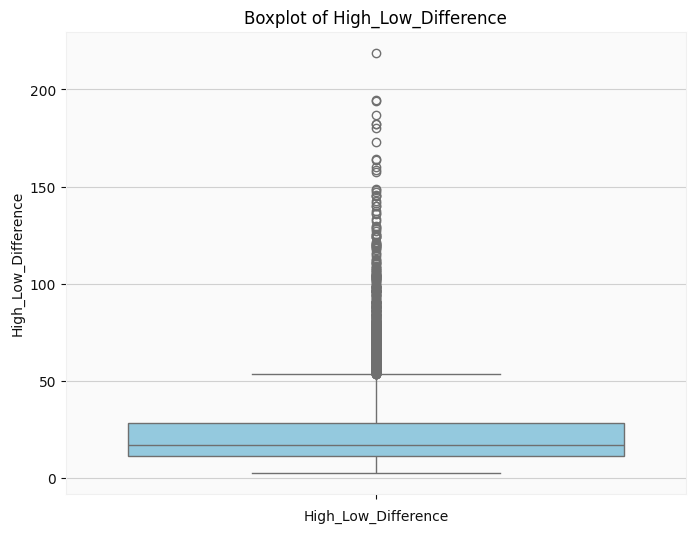

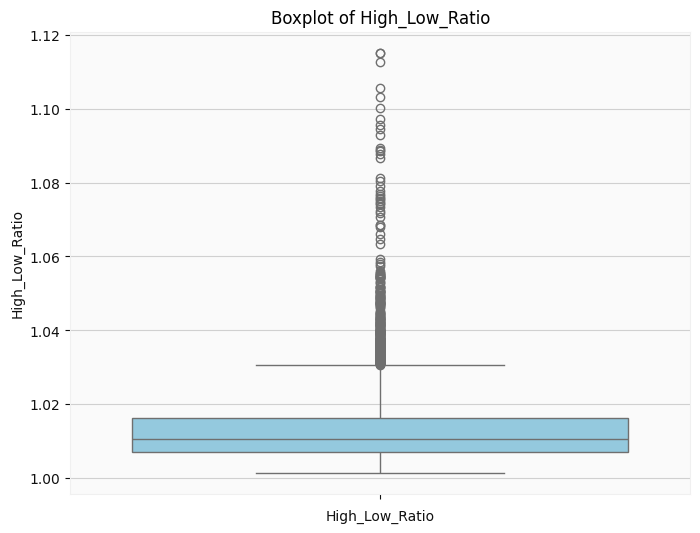

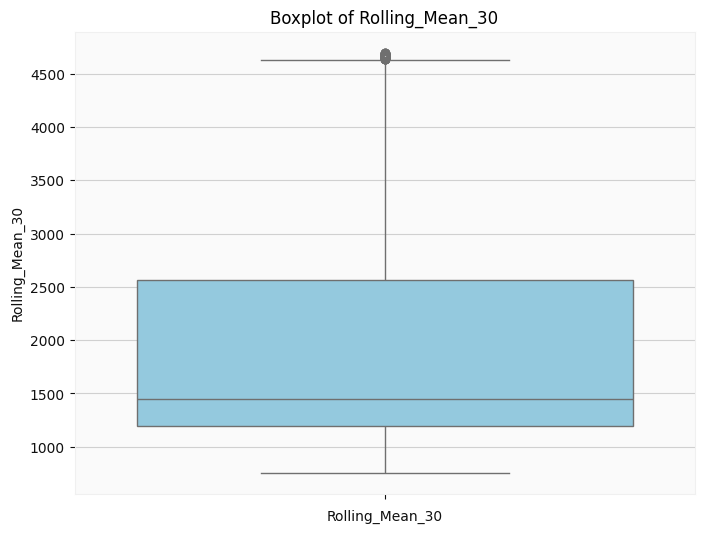

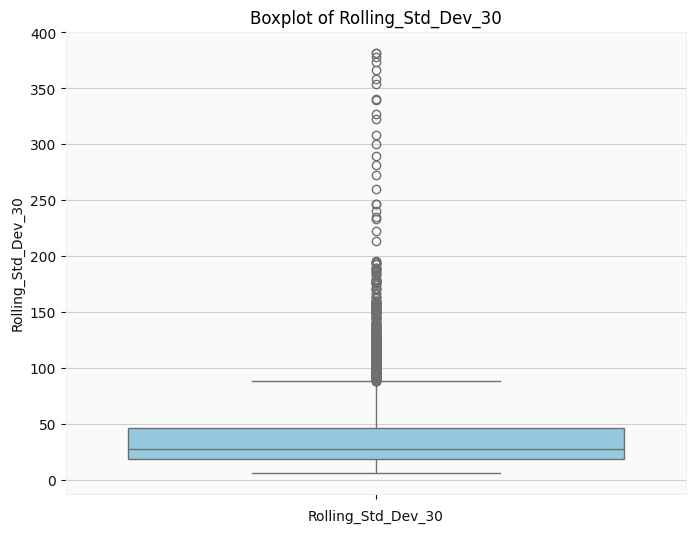

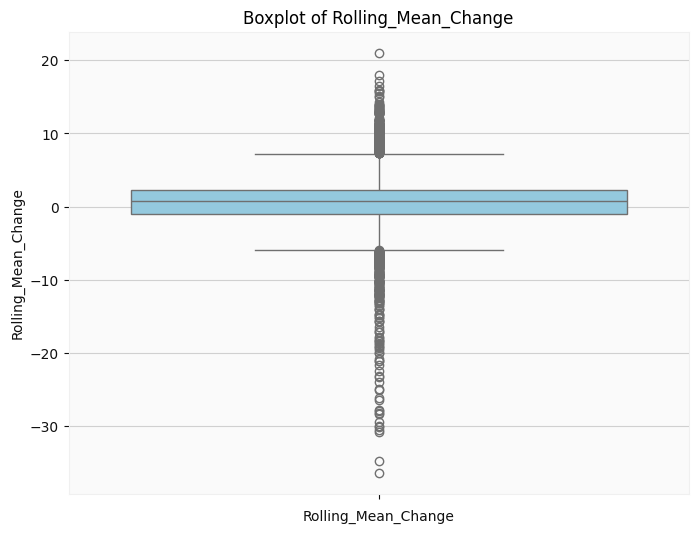

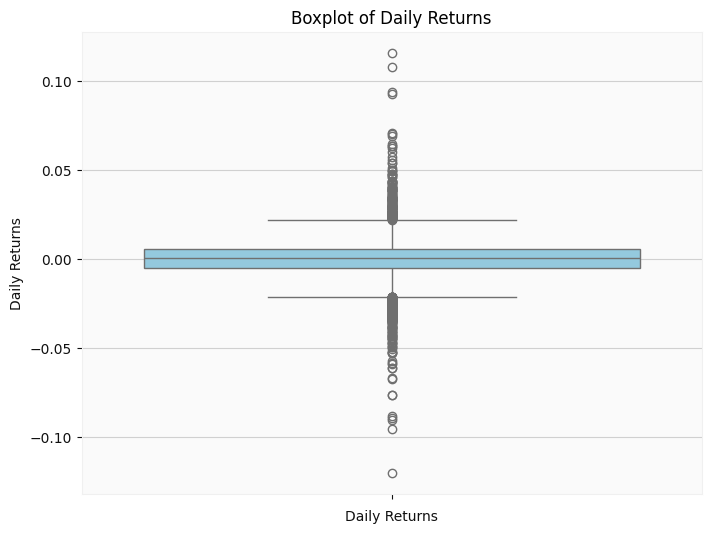

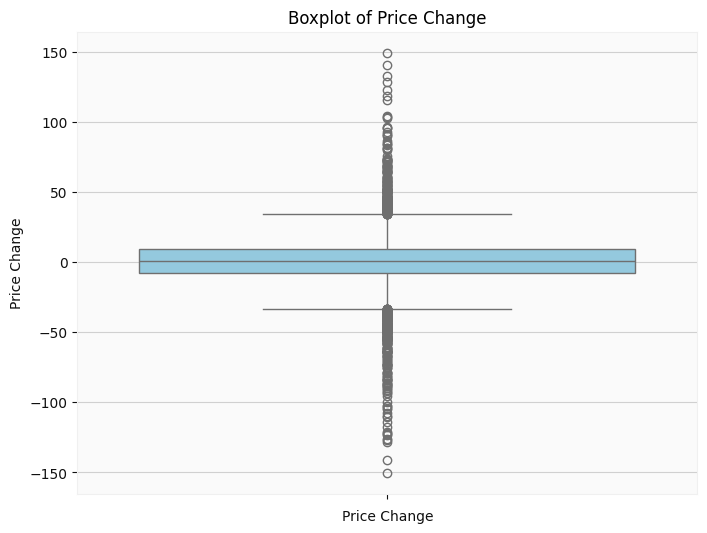

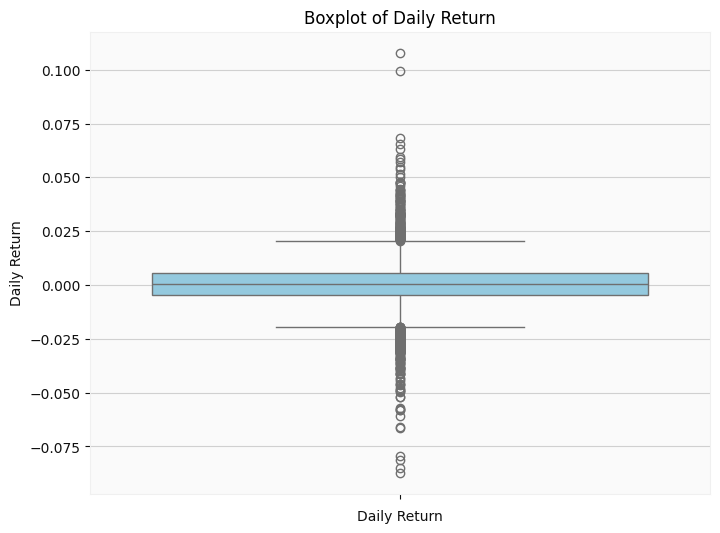

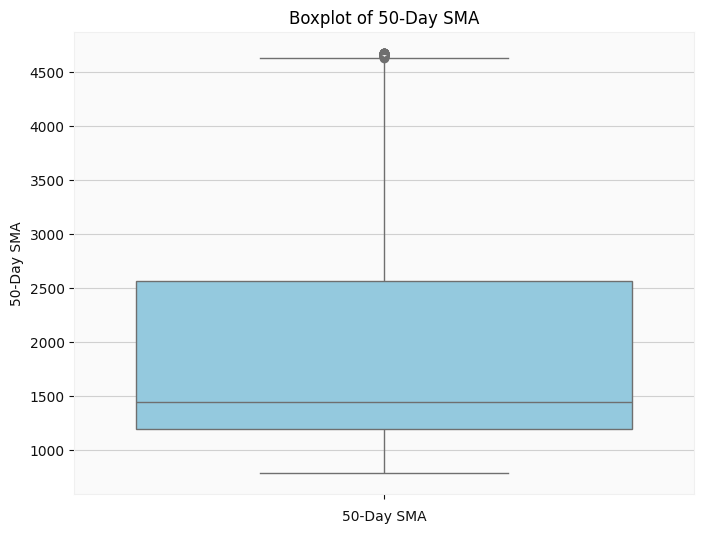

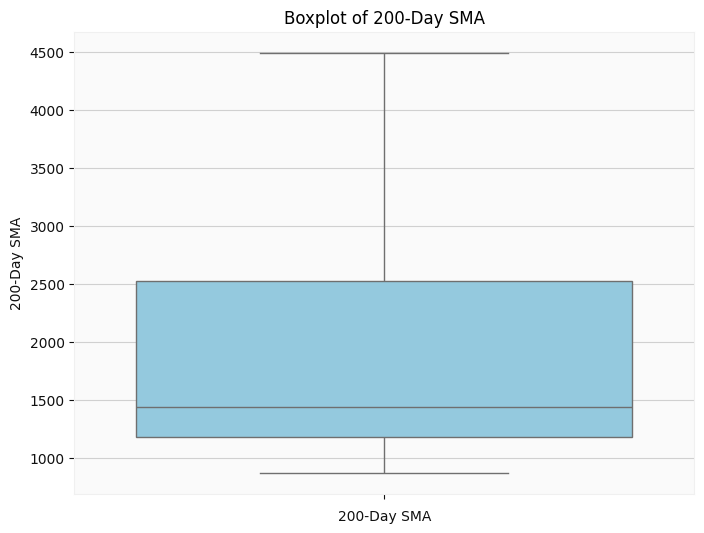

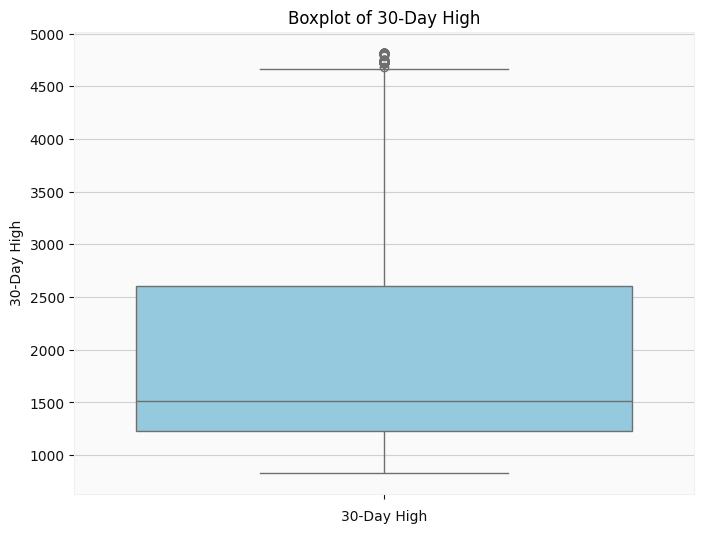

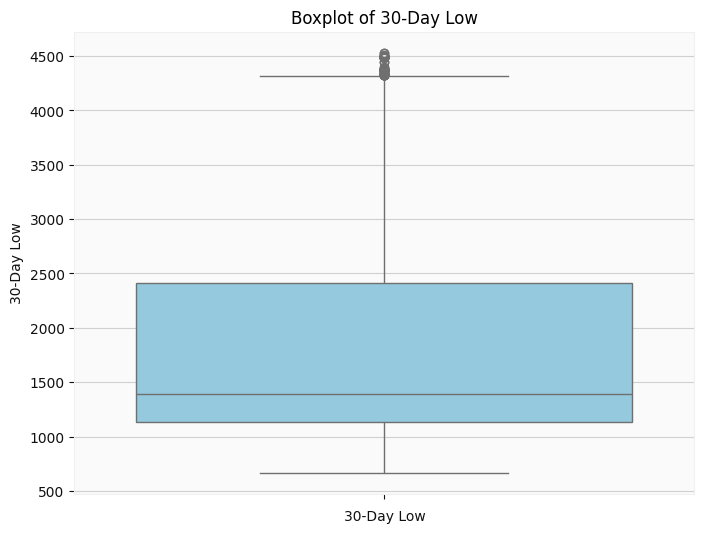

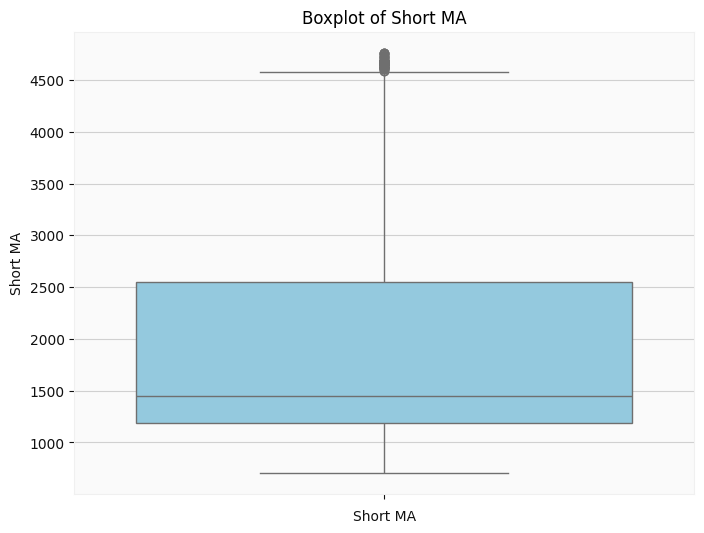

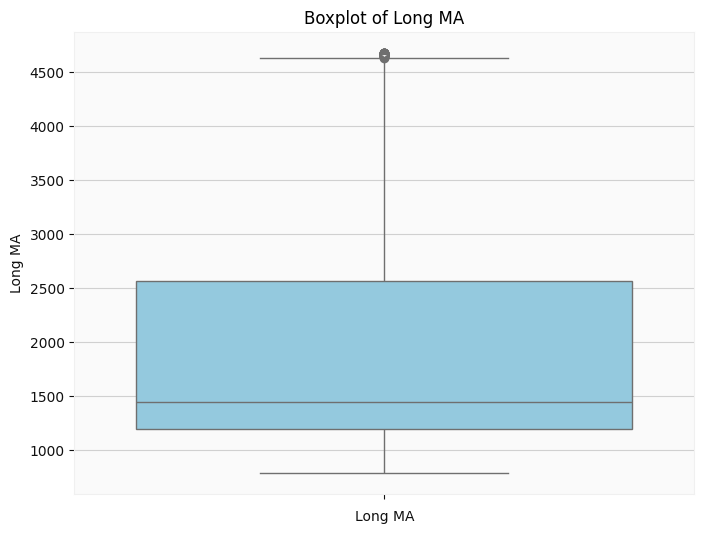

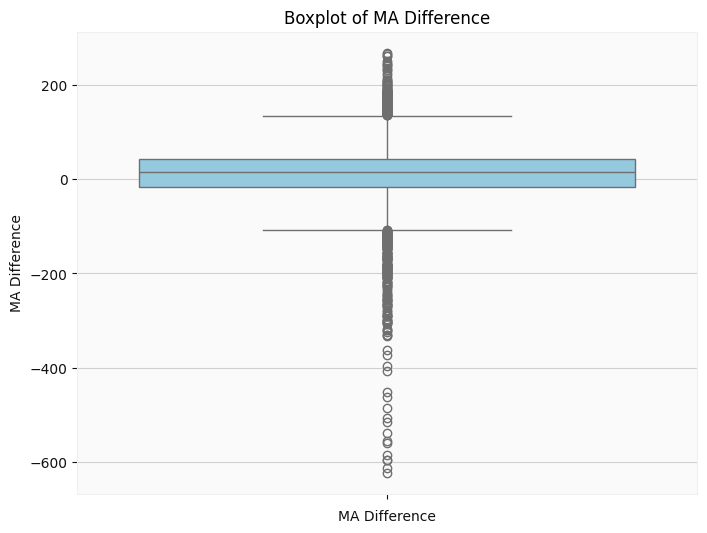

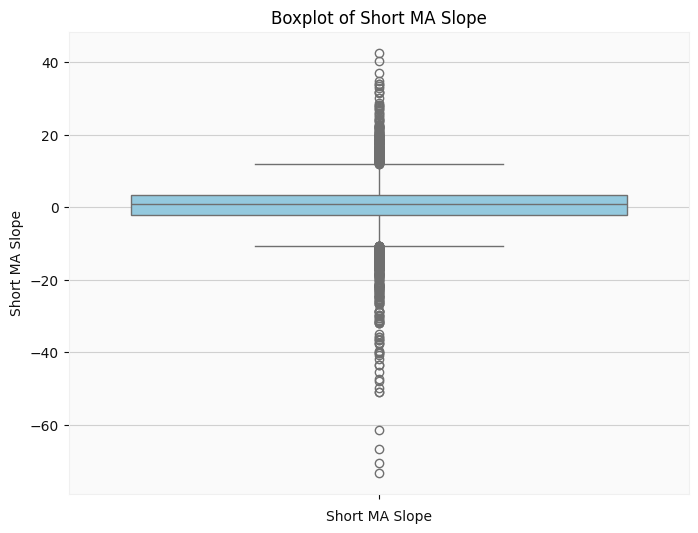

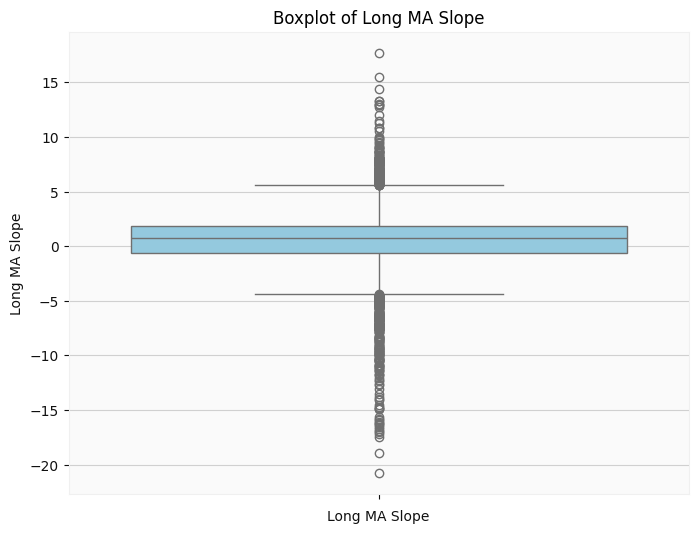

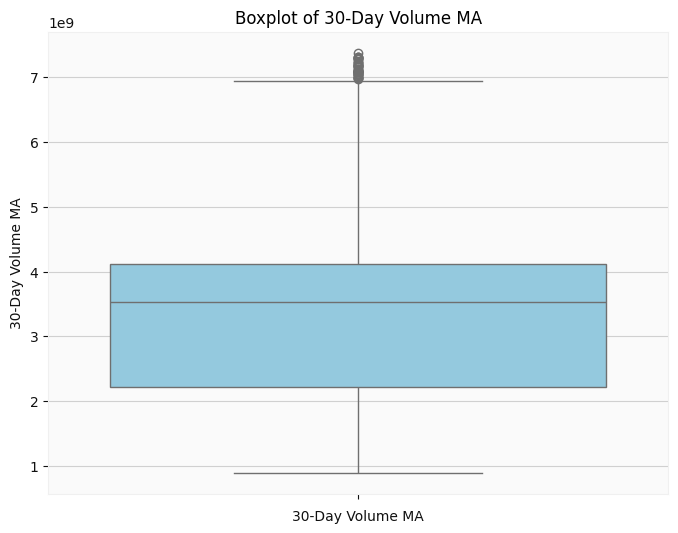

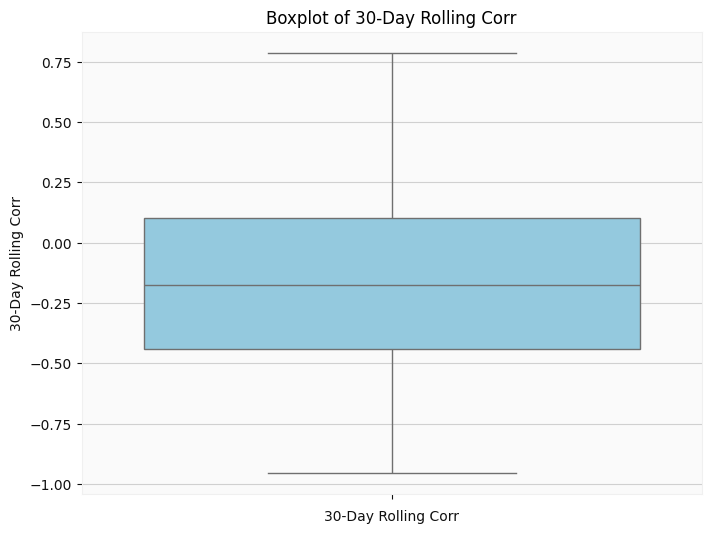

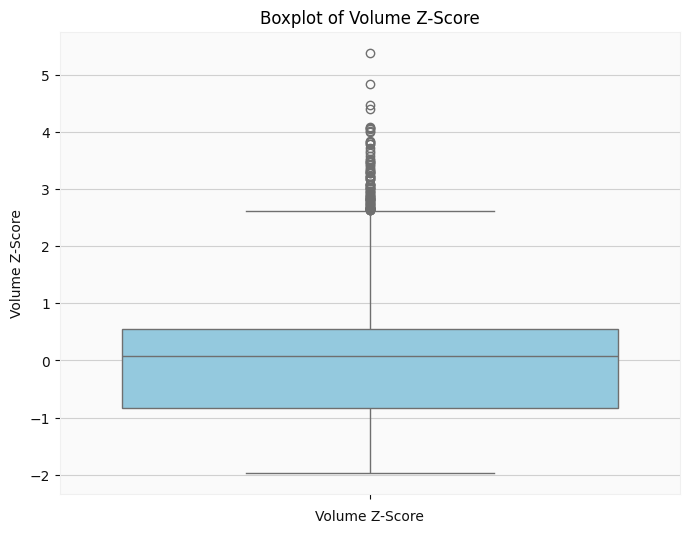

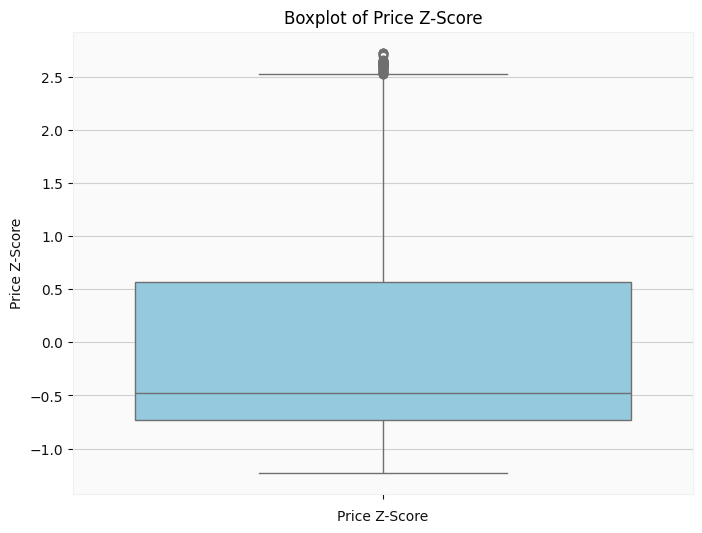

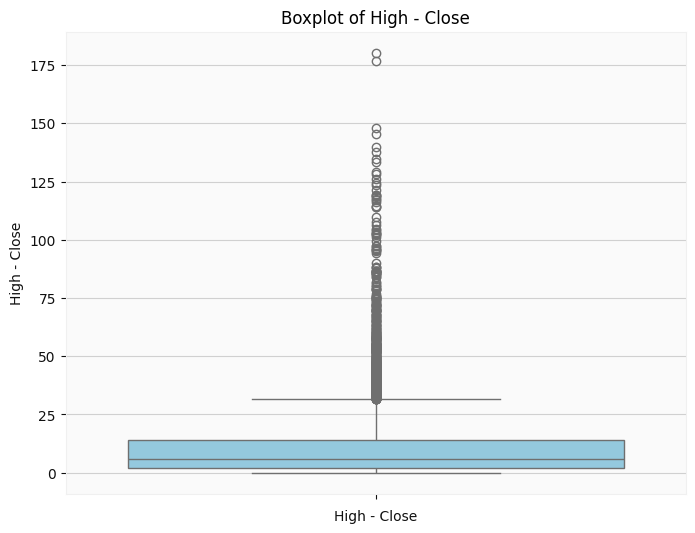

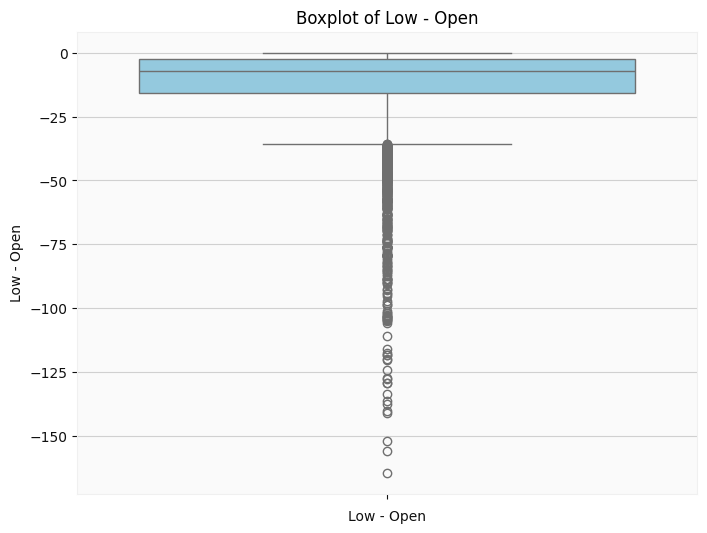

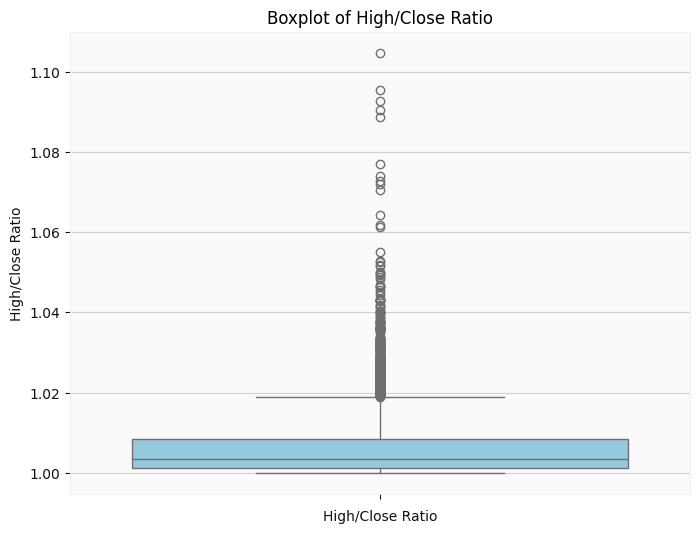

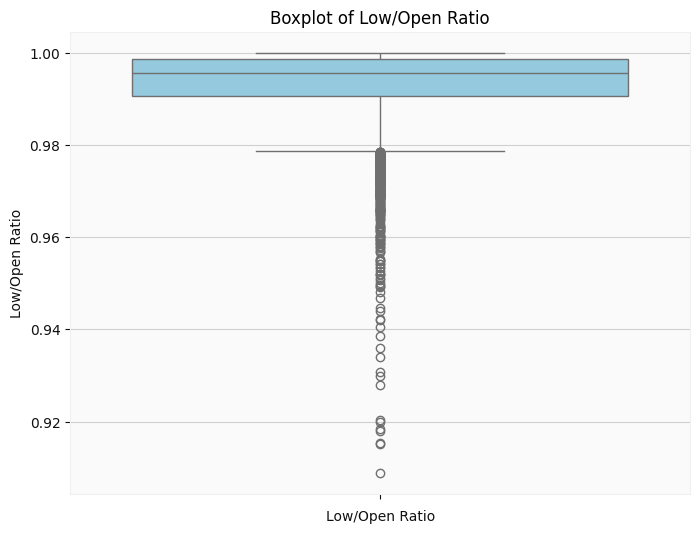

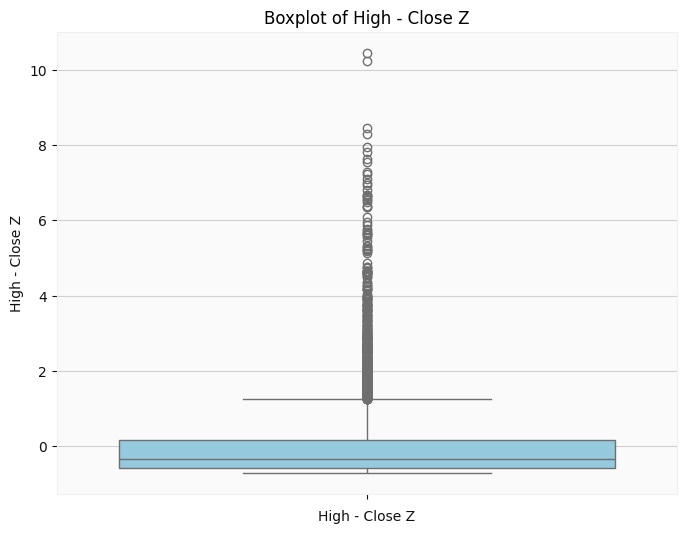

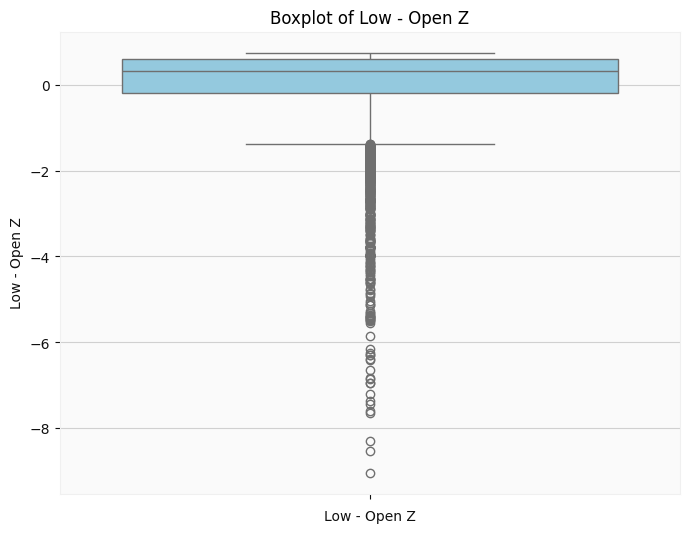

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [69]:
# Loop through numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

outliers_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Store results
    outliers_summary[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Num Outliers': len(outliers),
        'Outliers': outliers[[col]].to_dict('records')
    }
    
# Print a summary of outliers for each column
for col, stats in outliers_summary.items():
    print(f"{col}:\n"
          f"  Q1: {stats['Q1']}\n"
          f"  Q3: {stats['Q3']}\n"
          f"  IQR: {stats['IQR']}\n"
          f"  Lower Bound: {stats['Lower Bound']}\n"
          f"  Upper Bound: {stats['Upper Bound']}\n"
          f"  Number of Outliers: {stats['Num Outliers']}\n")


Adj Close:
  Q1: 1190.6649475097656
  Q3: 2549.9274291992188
  IQR: 1359.2624816894531
  Lower Bound: -848.2287750244141
  Upper Bound: 4588.821151733398
  Number of Outliers: 54

Close:
  Q1: 1190.6649475097656
  Q3: 2549.9274291992188
  IQR: 1359.2624816894531
  Lower Bound: -848.2287750244141
  Upper Bound: 4588.821151733398
  Number of Outliers: 54

High:
  Q1: 1197.7275085449219
  Q3: 2562.5150756835938
  IQR: 1364.7875671386719
  Lower Bound: -849.4538421630859
  Upper Bound: 4609.696426391602
  Number of Outliers: 54

Low:
  Q1: 1183.4975280761719
  Q3: 2532.0225219726562
  IQR: 1348.5249938964844
  Lower Bound: -839.2899627685547
  Upper Bound: 4554.810012817383
  Number of Outliers: 58

Open:
  Q1: 1190.4499816894531
  Q3: 2551.7623901367188
  IQR: 1361.3124084472656
  Lower Bound: -851.5186309814453
  Upper Bound: 4593.731002807617
  Number of Outliers: 54

Volume:
  Q1: 2074987500.0
  Q3: 4157937500.0
  IQR: 2082950000.0
  Lower Bound: -1049437500.0
  Upper Bound: 7282362500

# Correlations

## High vs. Close and Low vs. Open:
Both pairs show near-perfect positive correlations (close to 1). This indicates that daily highs are strongly related to closing prices, and daily lows closely align with opening prices, which is expected in highly liquid and stable markets.
Slight deviations suggest the market sometimes experiences volatility between opening and closing, but not enough to break the strong correlations.
## Differences Between High & Close and Low & Open
Mean and Distribution:

On average, the High-Close difference is positive (~11.37), indicating that closing prices are usually below daily highs. This aligns with general market patterns where price peaks occur intraday.
The Low-Open difference has a negative mean (~-12.51), meaning opening prices are higher than daily lows, which may signal a tendency for the market to dip before recovering.
Large standard deviations for both metrics (~16) suggest significant variability in price ranges day-to-day.
Outliers:

Extreme values for High-Close differences (e.g., >2 standard deviations) often occur during market turbulence, such as:
Recessions or crises (e.g., 2008 financial crisis).
Significant market news or events in recent periods (2023 examples).
No extreme outliers were found for Low-Open differences using basic thresholds, suggesting a tighter range of variability for these.

## Ratios
High/Close and Low/Open Ratios:
The High/Close ratio's mean (~1.006) indicates that high prices tend to be 0.6% above close prices on average.
Similarly, the Low/Open ratio's mean (~0.993) suggests low prices average around 0.7% below open prices.
The narrow interquartile ranges (IQRs) show these ratios are consistent, with only minor deviations in unusual conditions.

## Extreme and Outlier Events
High-Close and Low-Open Z-Scores:

Outliers with Z-scores >3 often align with periods of high volatility (e.g., 2008 crash, COVID-19 pandemic, recent economic uncertainties in 2023).
These outliers represent opportunities to study volatility clustering or market anomaly behavior, valuable for trading or risk management strategies.
IQR-Based Outliers:

The large number of outliers in "High-Low Difference" and "Rolling Standard Deviation" suggests that intraday volatility spikes frequently breach typical thresholds. This could point to:
Market inefficiencies or speculative trading during those periods.
Underlying structural changes in the market dynamics (e.g., during crises).

## Broader Observations
Price Distribution:

Summary statistics show that prices generally fall within reasonable bounds. A few outliers (e.g., extremely high or low prices) align with known market events, such as technology booms or crashes.
Volume Insights:

Volume exhibits a higher number of outliers compared to prices, suggesting that liquidity shifts significantly during market events. These spikes may indicate the presence of large institutional trades, news events, or broader market reactions.
Return Characteristics:

Daily returns are fairly stable, with most within ±2% (low outlier count). Outliers here often align with periods of significant market disruption.

## Seasonal or Monthly Trends

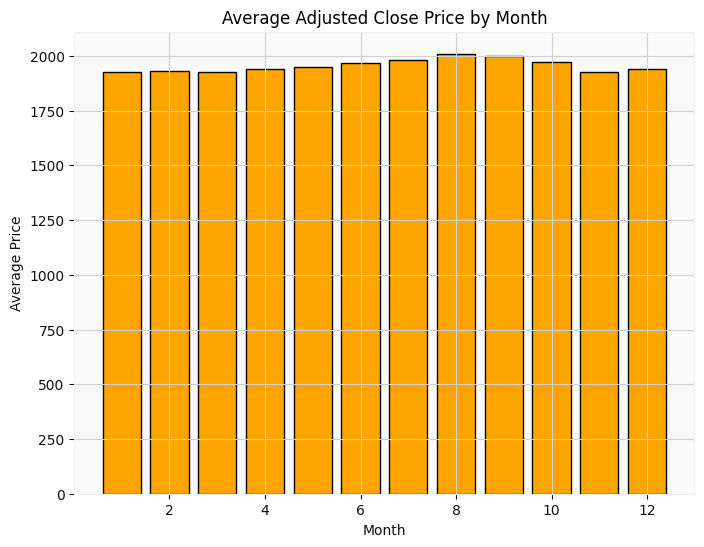

In [70]:
# Extract month from the Date column
df_Month = df

df_Month['Month'] = df_Month['Date'].dt.month

# Group by month and calculate average adjusted close price
monthly_avg = df_Month.groupby('Month')['Adj Close'].mean()

# Plot average monthly prices
plt.figure(figsize=(8, 6))
plt.bar(monthly_avg.index, monthly_avg, color='orange', edgecolor='black')
plt.title('Average Adjusted Close Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()


## Lagged Correlation

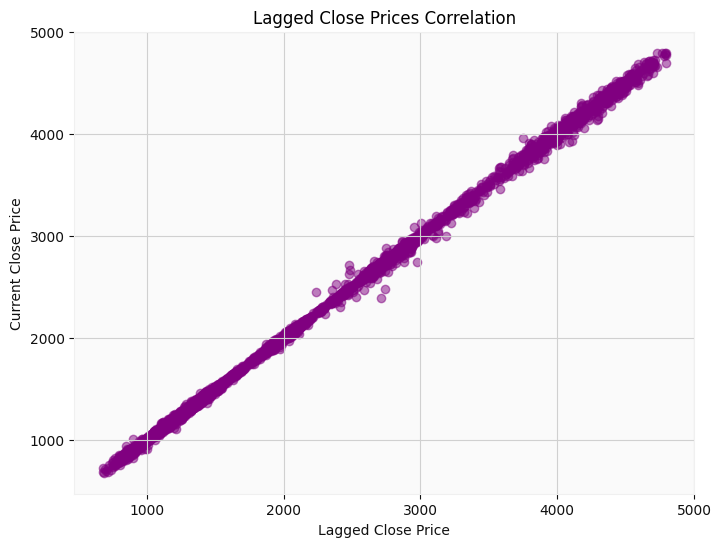

In [71]:
# Create lagged data
df_Lagged_Close = df

df_Lagged_Close['Lagged Close'] = df_Lagged_Close['Adj Close'].shift(1)

# Plot lagged correlation
plt.figure(figsize=(8, 6))
plt.scatter(df_Lagged_Close['Lagged Close'], df_Lagged_Close['Adj Close'], alpha=0.5, color='purple')
plt.title('Lagged Close Prices Correlation')
plt.xlabel('Lagged Close Price')
plt.ylabel('Current Close Price')
plt.show()


## Pair Plot

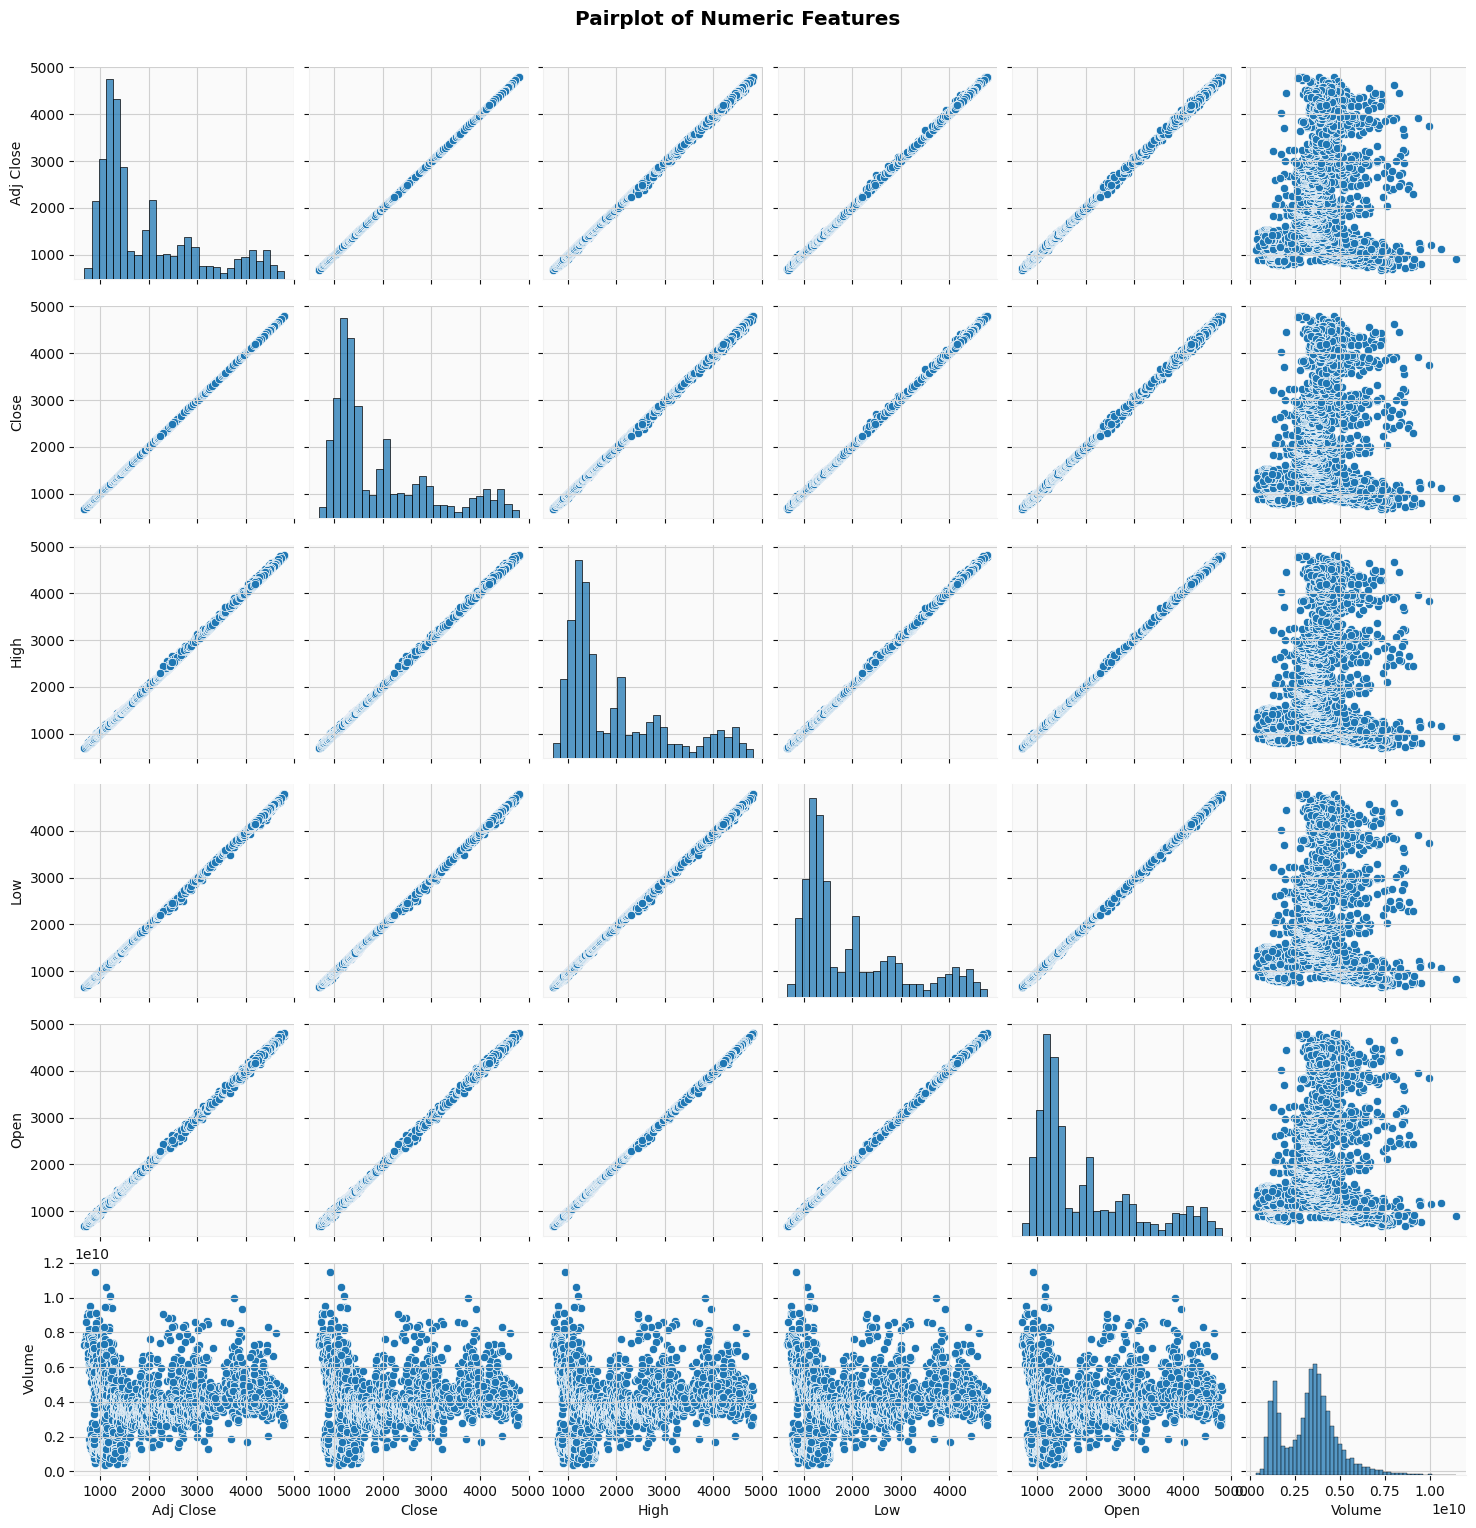

In [72]:
# Pairplot for all numeric columns
sns.pairplot(df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()
